<h1 style="color:purple; background:yellow; line-height:2; text-align:center">📊 START-UP ACQUISITION STATUS PREDICTION 📊</h1>
<h4 style="color:red; text-align:right">By: Mr. Suraj Honkamble</h4>

<h2 style="color:blue; background:lightblue;line-height:2; text-align:center;">Table of Content: 🎡🎡</h2>
<h3 style="color:magenta; line-height:1.7;">1. Objective of the Project<br>
    2. Data info<br>
    3. Loading the packages or libraries<br>
    4. Loading the dataset<br>
    5. Understandng our data<br>
    6. Data Cleaning<br>
    &nbsp;&nbsp;&nbsp;&nbsp; i. Delete irrelevant & redundant information<br>
    &nbsp;&nbsp;&nbsp;&nbsp; ii. Remove noise or unreliable data (duplicate, missing values and outliers).<br>
    &nbsp;&nbsp;&nbsp;&nbsp; iii. Data Transformation<br>
    &nbsp;&nbsp;&nbsp;&nbsp; iv. Feature Creation<br>
    7. Exploratory Data Analysis<br>
    &nbsp;&nbsp;&nbsp;&nbsp; i. Univariate Analysis<br>
    &nbsp;&nbsp;&nbsp;&nbsp; ii. Bivariate Analysis<br>
    &nbsp;&nbsp;&nbsp;&nbsp; iii. Multivariate Analysis<br>
    8. Feature Engineering<br>
    &nbsp;&nbsp;&nbsp;&nbsp; i. Feature Selection Techniques<br>
    &nbsp;&nbsp;&nbsp;&nbsp; ii. Feature Reduction Techniques<br>
    9. ML Model Building<br>
    </h3>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Objective of the Project: 🎯🎯</h2>
<h3 style="color:green; line-height:1.2;"> The objective of the project is to predict whether a startup which is currently Operating, IPO, Acquired, or closed.This problem will be solved through a Supervised Machine Learning approach by training a model based on the history of startups which were either acquired or closed.</h3>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Data Info: 📰📰</h2>
<h3 style="color:green; line-height:1.5;">There are 196562 rows and 44 columns out of which will be used as features. The rest provide more information about the data, but will not be used for model training (like normalized name, entity id, short description etc.)<br><br>
    <b style="color:red"> 1. entity_type : </b> Type of company.<br>
    <b style="color:red"> 2. entity_id : </b> Unique Id for each entity.<br>
    <b style="color:red"> 3. name : </b> Name of the entity or company.<br>
    <b style="color:red"> 4. category_code : </b> Type of company.<br>
    <b style="color:red"> 5. status : </b> Status of the company, whether it is operating or not and this is our target variable.<br>
    <b style="color:red"> 6. founded_at : </b> Company foundation yera.<br>
    <b style="color:red"> 7. closed_at : </b> Company shut-down year.<br>
    <b style="color:red"> 8. country_code, state_code, city, region : </b> Country, State, City and region which the company located at.<br>
    <b style="color:red"> 9. first_investment_at, last_investment_at : </b> First and Last Investment Dates.<br>
    <b style="color:red"> 10. investment_rounds : </b> Count of Investment rounds take place.<br>
    <b style="color:red"> 11. invested_companies : </b> Count of companies who are invested in this company.<br>
    <b style="color:red"> 12. first_funding_at, last_funding_at : </b> First and Last funding date.<br>
    <b style="color:red"> 13. funding_rounds : </b> Count of funding rounds.<br>
    <b style="color:red"> 14. funding_total_usd : </b> Amount of total funding in US Dollar.<br>
    <b style="color:red"> 15. first_milestone_at, last_milestone_at : </b> Date on which company achieved their first and last targeted milestone.<br>
    <b style="color:red"> 16. milestones : </b> Number of milestones achieved by each company.<br>
    <b style="color:red"> 17. relationships : </b> Number of relations company has with various stackholders.<br>
    <b style="color:red"> 18. created_by : </b> Company Creator name.<br>
    <b style="color:red"> 19. created_at, updated_at : </b> Company Created and Updated dates.<br>
    <b style="color:red"> 20. lat, lng : </b> Latitude and Longitude of the company location.<br>
    <b style="color:red"> 21. ROI : </b> Return of Investment.<br>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Import required libraries 📕📗</h2>

In [9]:
# Data loading and manipulating libraries
import pandas as pd
import numpy as np

# Set column visibility to 50, because our dataset contains 44 column
pd.set_option('display.max_columns', 50)

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Avoiding uncessary warnings
import warnings
warnings.filterwarnings('ignore')

# Train Test Split
from sklearn.model_selection import train_test_split

# Feature Engineering-Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Feature Selection and Feature Reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Oversampling the lower target class
from imblearn.over_sampling import SMOTE

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix


# Classification Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center">Loading the dataset 📂📂</h2>

In [ ]:
df=pd.read_csv('Data/companies.csv')
df.head()

id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Company      10001        NaN   

                 name     normalized_name                    permalink  \
0            Wetpaint            wetpaint            /company/wetpaint   
1             Flektor             flektor             /company/flektor   
2               There               there               /company/there   
3             MYWEBBO             mywebbo             /company/mywebbo   
4  THE Movie Streamer  the movie streamer  /company/the-movie-streamer   

     category_code     status  founded_at closed_at                domain  \
0              web  operating  2005-10-17       NaN      wetpaint-inc.com   
1      games_video   acquired         NaN       NaN           flektor.com   
2      games_video   acquired         NaN       NaN             there.com   
3  network_hosting  operating  2008-07-26       NaN           mywebbo.com   
4      games_video  operating  2008-07-26       NaN  themoviestreamer.com   

                  homepage_url twitter_username  \
0      http://wetpaint-inc.com  BachelrWetpaint   
1       http://www.flektor.com              NaN   
2         http://www.there.com              NaN   
3       http://www.mywebbo.com              NaN   
4  http://themoviestreamer.com              NaN   

                                            logo_url  logo_width  logo_height  \
0  http://s3.amazonaws.com/crunchbase_prod_assets...       401.0         54.0   
1  http://s3.amazonaws.com/crunchbase_prod_assets...       186.0         85.0   
2  http://s3.amazonaws.com/crunchbase_prod_assets...       107.0         34.0   
3                                                NaN         NaN          NaN   
4  http://s3.amazonaws.com/crunchbase_prod_assets...       200.0         74.0   

  short_description                  description  \
0               NaN  Technology Platform Company   
1               NaN                          NaN   
2               NaN                          NaN   
3               NaN                          NaN   
4               NaN                          NaN   

                                            overview  \
0  Wetpaint is a technology platform company that...   
1  Flektor is a rich-media mash-up platform that ...   
2  There.com is an online virtual world where any...   
3  BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...   
4  This company shows free movies online on their...   

                                            tag_list country_code state_code  \
0  wiki, seattle, elowitz, media-industry, media-...          USA         WA   
1                              flektor, photo, video          USA         CA   
2                         virtualworld, there, teens          USA         CA   
3  social-network, new, website, web, friends, ch...          NaN        NaN   
4  watch, full-length, moives, online, for, free,...          NaN        NaN   

          city       region first_investment_at last_investment_at  \
0      Seattle      Seattle                 NaN                NaN   
1  Culver City  Los Angeles                 NaN                NaN   
2    San Mateo       SF Bay                 NaN                NaN   
3          NaN      unknown                 NaN                NaN   
4          NaN      unknown                 NaN                NaN   

   investment_rounds  invested_companies first_funding_at last_funding_at  \
0                NaN                 NaN       2005-10-01      2008-05-19   
1                NaN                 NaN              NaN             NaN   
2                NaN                 NaN              NaN             NaN   
3                NaN                 NaN              NaN             NaN

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center">Understanding Our Data 👁📰

In [ ]:
df.shape

(196553, 44)

In [ ]:
df.size

8648332

In [ ]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

### Descriptive statistics

In [ ]:
df.describe().T.round(2)

count         mean          std     min        25%  \
Unnamed: 0.1        196553.0     98276.00     56740.11    0.00   49138.00   
entity_id           196553.0    153006.23     90209.25    1.00   59850.00   
parent_id                0.0          NaN          NaN     NaN        NaN   
logo_width          110110.0       459.13       594.98    1.00     192.00   
logo_height         110110.0       222.73       333.09    1.00      70.00   
investment_rounds     2591.0         2.37        12.17    1.00       1.00   
invested_companies    2591.0         2.20        11.44    1.00       1.00   
funding_rounds       31707.0         1.66         1.20    1.00       1.00   
funding_total_usd    27874.0  14816520.42  67759366.56  291.00  500000.00   
milestones           91699.0         1.20         0.54    1.00       1.00   
relationships       129667.0         2.85         9.10    1.00       1.00   
lat                  83852.0        37.56        15.48  -50.94      34.05   
lng                  83852.0       -52.12        70.05 -159.50    -111.94   
ROI                    726.0        45.75       572.04    0.01       2.65   

                           50%          75%           max  
Unnamed: 0.1          98276.00    147414.00  1.965520e+05  
entity_id            174539.00    232655.00  2.862150e+05  
parent_id                  NaN          NaN           NaN  
logo_width              267.00       484.00  1.820000e+04  
logo_height             105.00       232.00  9.600000e+03  
investment_rounds         1.00         1.00  4.780000e+02  
invested_companies        1.00         1.00  4.590000e+02  
funding_rounds            1.00         2.00  1.500000e+01  
funding_total_usd   2564500.00  11000000.00  5.700000e+09  
milestones                1.00         1.00  9.000000e+00  
relationships             1.00         3.00  1.189000e+03  
lat                      39.77        45.42  7.755000e+01  
lng                     -77.04        -0.13  1.762100e+02  
ROI                       6.50        13.55  1.333333e+04

In [ ]:
df.describe(include='object').T

count  unique  \
id                   196553  196553   
entity_type          196553       1   
name                 196531  196348   
normalized_name      196527  195451   
permalink            196553  196512   
category_code        123186      42   
status               196553       4   
founded_at            91227    6156   
closed_at              2620     925   
domain               126545  125498   
homepage_url         126545  125961   
twitter_username      80591   79571   
logo_url             110110  110110   
short_description      7131    7126   
description           92048   83696   
overview             126971  126515   
tag_list              81452   79133   
country_code          87990     175   
state_code            50903      51   
city                  83890   10652   
region               196553    5847   
first_investment_at    2583    1197   
last_investment_at     2583    1105   
first_funding_at      31507    3208   
last_funding_at       31507    2978   
first_milestone_at    91699    4080   
last_milestone_at     91699    3966   
created_by           155533   55329   
created_at           196553  182851   
updated_at           196553  183558   

                                                                   top    freq  
id                                                                 c:1       1  
entity_type                                                    Company  196553  
name                                                                 L       8  
normalized_name                                                      l       9  
permalink                                           /company/bboescape       3  
category_code                                                 software   17922  
status                                                       operating  183441  
founded_at                                                  2011-01-01    3748  
closed_at                                                   2012-01-01     176  
domain                                                placeshilton.com      44  
homepage_url                                http://www.dachisgroup.com       5  
twitter_username                                            Goodman_UK      20  
logo_url             http://s3.amazonaws.com/crunchbase_prod_assets...       1  
short_description                                                    L       3  
description                             Garage Door Repair/Replacement     144  
overview                                                            We      40  
tag_list             garage-door-springs, broken-spring-repair--rep...     210  
country_code                                                       USA   51637  
state_code                                                          CA   16489  
city                                                          New York    3816  
region                                                         unknown  109866  
first_investment_at                                         2009-01-01      33  
last_investment_at                                          2012-01-01      33  
first_funding_at                                            2008-01-01     343  
last_funding_at                                             2012-01-01     272  
first_milestone_at                                          2012-01-01    3152  
last_milestone_at                                           2012-01-01    2937  
created_by                                                  dhawalarco   10005  
created_at                                         2008-02-16 00:00:05       9  
updated_at                                         2012-11-04 00:27:06       8

### Duplicate Values

In [ ]:
df.duplicated().sum()

0

### Missing value

In [ ]:
print("Count of Missing values in each column\n", df.isna().sum())
print("\n")
print("Percentage of Missing values in each column\n",round(df.isna().sum()/df.shape[0]*100, 2))

Count of Missing values in each column
 id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046


<h2 style="color:red;">Basic Observations: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. Data set contains 1,96,553 rows and 44 columns.<br>
    2. All date related columns are of object data type. We need to convert it to date type.<br>
    3. Many columns in our dataset are not going to contribute in predicting the status of the company.<br>
    4. Data set contains no duplicate rows.<br>
    5. parent_id column in our dataset has 100% null values. Surely we are going to drop this.<br>
    6. "Status" column is our target variable and it is free of null values.<br>
    7. The variable "investment_rounds" has a mean of 2.37 with a wide standard deviation of 12.17, indicating significant variability in the number of investment rounds.<br>
    8. The "funding_total_usd" variable has a mean of 1,48,16,520.42 and a large standard deviation of 6,77,59,366.56. This wide spread suggests a significant disparity in the funding amounts received by different entities, with some potentially securing very high amounts.<br>
    9. The mean latitude is 37.56, and the mean longitude is -52.12. These values indicate a general location for most companies.<br>
    10. The "ROI" variable has a mean of 45.75 and a large standard deviation of 572.04. This suggests that while the average ROI is positive, there is considerable variability, with some entities potentially achieving very high returns<br>
    11. The "milestones" and "relationships" variables have relatively low Means, this means, on average entities have a small number of milestones and relationships. However, the wide standard deviations indicate variability in these aspects among different entities.<br>
    12. The "id" column has 1,96,553 unique values, suggesting each entry has a distinct identifier.<br>
    13. All entities in the dataset belong to a single entity type "Company".<br>
    14. The "name" column has 1,96,530 entries, with 1,96,347 unique names. The most frequent name is "L" with a frequency of 8. This also suggest that we have duplicates rows.
    15. The "category_code" column has 1,23,186 unique entries, with the most frequent category being "software" with a frequency of 17,922.<br>
    16. The "status" column has 1,96,553 entries, with the most frequent status being "operating" with a frequency of 183,441.<br>
    17. The "closed_at" column has 2,620 unique entries, with the most common closing date being "2012-01-01" with a frequency of 176.<br>
    18. Various columns like "first_investment_at," "last_investment_at," "first_funding_at," "last_funding_at," "first_milestone_at," and "last_milestone_at" contain date information indicating the timeframes of different activities.<br>
    19. "USA" is the most common country code (51,637 times). For states, "CA" (California) leads with 16,489 occurrences out of 50,903. In cities, "New York" is the most frequent, appearing 3,816 times out of 83,890.<br>
    20. The "created_by" column has 155,533 unique entries, with the most frequent creator being "dhawalarco" with a frequency of 10,005.</h4>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Data Cleaning 🔎🔧</h2>

<h2 style="color:red; line-height:1.5">1. Delete irrelevant & redundant information<br>
    2. Remove noise or unreliable data (duplicate, missing values and outliers).</h2>

<h3 style="color:red;">1. Delete irrelevant & redundant information</h3>
<h4 style="color:blue; line-height:1.7">a. Delete 'region','city','state_code' as they provide too much of granularity.<br>
    b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.<br>
    c. Delete 'name', domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink' as they are irrelevant features.</h4>

In [ ]:
unwanted_col=['name', 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'region','city','state_code',
              'created_by', 'created_at', 'updated_at', 'normalized_name', 'permalink', 'domain','homepage_url',
              'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description',
              'overview', 'tag_list']

df.drop(unwanted_col, axis=1, inplace=True)
df.columns

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng',
       'ROI'],
      dtype='object')

<h3 style="color:red; line-height:1.5">2. Remove noise or unreliable data (duplicate entries, missing values and outliers).</h3>

<h3 style="color:blue;">2.1. Handling Duplicate Values</h3>

In [ ]:
df.duplicated().sum()

87089

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(109464, 20)

<h3 style="color:blue;">2.2. Missing Value Treatment</h3>

In [ ]:
round(df.isna().sum()/df.shape[0]*100, 2)

category_code          11.17
status                  0.00
founded_at             24.59
closed_at              97.61
country_code           22.72
first_investment_at    97.95
last_investment_at     97.95
investment_rounds      97.94
invested_companies     97.94
first_funding_at       71.25
last_funding_at        71.25
funding_rounds         71.07
funding_total_usd      74.55
first_milestone_at     48.74
last_milestone_at      48.74
milestones             48.74
relationships          31.43
lat                    25.91
lng                    25.91
ROI                    99.34
dtype: float64

<h3 style="color:blue;">2.2.1. Drop the columns which contains more than 97% of null rows.</h3>

In [ ]:
drop_cols=['ROI','first_investment_at','last_investment_at','investment_rounds','invested_companies']
df.drop(columns=drop_cols, inplace=True)
round(df.isna().sum()/df.shape[0]*100, 2)

category_code         11.17
status                 0.00
founded_at            24.59
closed_at             97.61
country_code          22.72
first_funding_at      71.25
last_funding_at       71.25
funding_rounds        71.07
funding_total_usd     74.55
first_milestone_at    48.74
last_milestone_at     48.74
milestones            48.74
relationships         31.43
lat                   25.91
lng                   25.91
dtype: float64

In [ ]:
df.shape

(109464, 15)

<h3 style="color:blue;">2.2.2. Delete instances with missing values for 'country_code', 'category_code', 'founded_at' 'first_funding_at', 'first_milestone_at', 'relationships' and 'lat'.</h3>
<h4> (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [ ]:
df.dropna(subset=['country_code','category_code','founded_at','first_funding_at',
                  'first_milestone_at', 'relationships', 'lat'], axis=0, inplace=True)
round(df.isna().sum()/df.shape[0]*100, 2)

category_code          0.00
status                 0.00
founded_at             0.00
closed_at             94.64
country_code           0.00
first_funding_at       0.00
last_funding_at        0.00
funding_rounds         0.00
funding_total_usd     10.13
first_milestone_at     0.00
last_milestone_at      0.00
milestones             0.00
relationships          0.00
lat                    0.00
lng                    0.00
dtype: float64

In [ ]:
df.shape

(13716, 15)

<h3 style="color:blue;">2.2.3. Fill the missing values in numerical columns, 'funding_total_usd' by median.</h3>

- The median is less sensitive to extreme values compared to the mean. Imputing missing values with the median can be a good choice for right-skewed data as it is robust to outliers.

In [ ]:
median=df['funding_total_usd'].median()
df['funding_total_usd'].fillna(median, inplace=True)
round(df.isna().sum()/df.shape[0]*100, 2)

category_code          0.00
status                 0.00
founded_at             0.00
closed_at             94.64
country_code           0.00
first_funding_at       0.00
last_funding_at        0.00
funding_rounds         0.00
funding_total_usd      0.00
first_milestone_at     0.00
last_milestone_at      0.00
milestones             0.00
relationships          0.00
lat                    0.00
lng                    0.00
dtype: float64

<h2 style="color:blue;">Data Trasformation</h2>

<h3 style="color:red">1. Data Type Conversion</h3>

In [ ]:
df.dtypes

category_code          object
status                 object
founded_at             object
closed_at              object
country_code           object
first_funding_at       object
last_funding_at        object
funding_rounds        float64
funding_total_usd     float64
first_milestone_at     object
last_milestone_at      object
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

<h3 style="color:blue;">1.1. Convert data type of "relationships", "funding_rounds", "milestones" from float to integer.</h3>

In [ ]:
df['funding_rounds']=df['funding_rounds'].astype(int)
df['milestones']=df['milestones'].astype(int)
df['relationships']=df['relationships'].astype(int)

df[['funding_rounds','milestones','relationships']].dtypes

funding_rounds    int32
milestones        int32
relationships     int32
dtype: object

<h3 style="color:blue;">1.2. Convert data type of Date column from object to datetime and the extract only year.</h3>

In [ ]:
df['founded_at']=pd.to_datetime(df['founded_at']).dt.year
df['closed_at']=pd.to_datetime(df['closed_at']).dt.year
df['first_funding_at']=pd.to_datetime(df['first_funding_at']).dt.year
df['last_funding_at']=pd.to_datetime(df['last_funding_at']).dt.year
df['first_milestone_at']=pd.to_datetime(df['first_milestone_at']).dt.year
df['last_milestone_at']=pd.to_datetime(df['last_milestone_at']).dt.year

df.dtypes

category_code          object
status                 object
founded_at              int64
closed_at             float64
country_code           object
first_funding_at        int64
last_funding_at         int64
funding_rounds          int32
funding_total_usd     float64
first_milestone_at      int64
last_milestone_at       int64
milestones              int32
relationships           int32
lat                   float64
lng                   float64
dtype: object

<h3 style="color:red">2. Generalizing the categorical data</h3>

<h3 style="color:blue">2.1. Generalize 'country_code'.</h3>

- Since there are 95 counties, one-hot encoding which is going to create a lot of columns so Lets Check the repetition of value in ascending order and keep the first 15 values and name remaining one as other.

In [ ]:
df['country_code'].nunique()

95

In [ ]:
other_countries = df['country_code'].value_counts()[9:].index
df['country_code'] = df['country_code'].replace(to_replace=other_countries, value='other')
df['country_code'].value_counts().sort_values(ascending=False)

USA      9596
other    1639
GBR       772
CAN       445
DEU       299
FRA       254
ISR       233
IND       201
ESP       167
AUS       110
Name: country_code, dtype: int64

<h3 style="color:blue">2.2. Generalize 'status'.</h3>

In [ ]:
df['status'].replace({'ipo':'operating','acquired':'not-operating','closed':'not-operating'}, inplace=True)
print((df['status'].value_counts()/df.shape[0]*100).round(2))

operating        84.1
not-operating    15.9
Name: status, dtype: float64


#### We can clealy see the imbalance in the target class.

<h3 style="color:blue">2.3. Generalize 'category_code'</h3>

- Since there are 42 categories, one-hot encoding which is going to create a lot of columns so Lets Check the repetition of value in ascending order and keep the first 15 values and name remaining one as other.

In [ ]:
df['category_code'].nunique()

42

In [ ]:
other_categories = df['category_code'].value_counts()[15:].index
df['category_code'] = df['category_code'].replace(to_replace=other_categories, value='other')
df['category_code'].value_counts().sort_values(ascending=False)

other              2636
software           2174
web                1531
mobile             1228
enterprise         1053
ecommerce           858
advertising         766
games_video         681
biotech             600
analytics           429
social              364
hardware            319
cleantech           301
finance             281
education           261
network_hosting     234
Name: category_code, dtype: int64

<h2 style="color:blue;">Feature Creation and Extraction.</h2>

### Creating "active_days" feature as below,
1. Replacing values in closed_at columns using below condition:
     -  if the value in status is 'operating' then in closed_at, Let's put 2021.
     -  Where as if the value is 'not-operating', let's put 0.
2. Subtract founded_date from closed_date, and calculate age in days.
3. Then drop the closed_at column.

In [ ]:
df['closed_at']=(np.where((df['status']=='operating'), 2021, df['closed_at']))
df['active_days'] = (df['closed_at'] - df['founded_at'])*365
df.drop('closed_at', axis=1, inplace=True)
df['active_days'].head()

0     5840.0
13       NaN
18       NaN
20    6570.0
24    5475.0
Name: active_days, dtype: float64

#### We know that "closed_at" column consists of missing values, lets check the percentage of missing values in "active_days" column and Drop these NaN values.

In [ ]:
df['active_days'].isna().sum()/df.shape[0]*100

10.542432195975502

In [ ]:
df.dropna(subset=['active_days'], axis=0, inplace=True)
df.shape

(12270, 15)

#### Lets check minimum and maximum active days

In [ ]:
df['active_days'].describe().T

count    12270.000000
mean      4758.118582
std       2388.033227
min      -3285.000000
25%       3650.000000
50%       4380.000000
75%       5475.000000
max      41975.000000
Name: active_days, dtype: float64

#### There are some rows which contains negative active days, lets find them and delete them from the data.

In [ ]:
df=df[df['active_days']>-1]

<h2 style="color:blue;">Outlier Treatment</h2>

#### Our dataset contains 5 numerical columns and these might posseses outliers. Lets check which of these column contains the outliers.

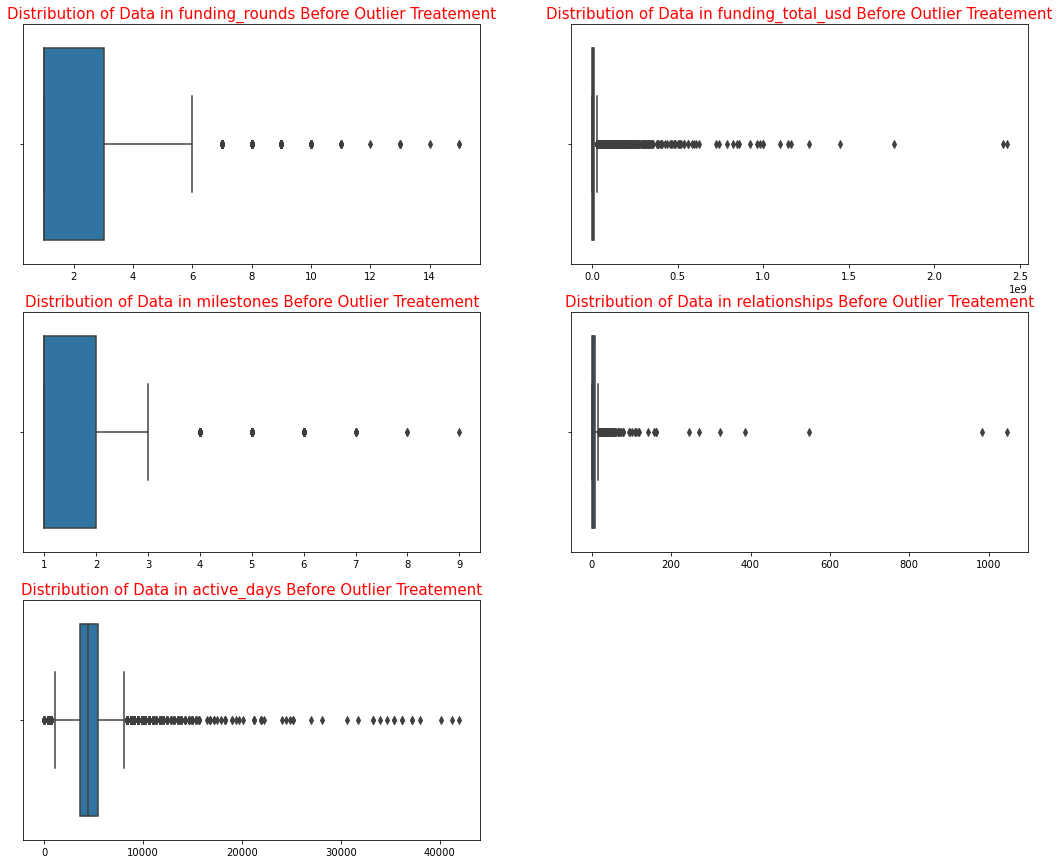

In [ ]:
num_col=['funding_rounds','funding_total_usd','milestones','relationships','active_days']

plt.figure(figsize=(18,15))
for i, col in enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=col, data=df)
    plt.xlabel("")
    plt.title(f"Distribution of Data in {col} Before Outlier Treatement", color='red',  fontsize=15);

#### All the 5 columns contains Outliers. But the exstreme outliers found in only three columns, "relationships", 'active_days and "funding_total_usd". Lets use IQR method to clip these outliers.

<h3 style="color:blue">1. Outlier Treatment in "funding_total_usd_column".</h3>

In [ ]:
q1 = df['funding_total_usd'].quantile(0.25)   # First quartile range
q3 = df['funding_total_usd'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of funding_total_usd = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['funding_total_usd']<upper_bound]

First quartile range = 720000.0
Second quartile range = 12800000.0
IQR of funding_total_usd = 12080000.0
Lower Limit = -17400000.0
Upper Limit = 30920000.0


<h3 style="color:blue">2. Outlier Treatment in "relationships" column.

In [ ]:
q1 = df['relationships'].quantile(0.25)   # First quartile range
q3 = df['relationships'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of relationships = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['relationships']< upper_bound]

First quartile range = 2.0
Second quartile range = 7.0
IQR of relationships = 5.0
Lower Limit = -5.5
Upper Limit = 14.5


<h3 style="color:blue">3. Outlier Treatment in "active_days" column.

In [ ]:
q1 = df['active_days'].quantile(0.25)   # First quartile range
q3 = df['active_days'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of active_days = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[(df['active_days']< upper_bound) & (df['active_days']> lower_bound)]

First quartile range = 3285.0
Second quartile range = 5110.0
IQR of active_days = 1825.0
Lower Limit = 547.5
Upper Limit = 7847.5


<h3 style="color:blue">4. Outlier Treatment in "funding_rounds" column.

In [ ]:
q1 = df['funding_rounds'].quantile(0.25)   # First quartile range
q3 = df['funding_rounds'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of funding_rounds = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['funding_rounds']< upper_bound]

First quartile range = 1.0
Second quartile range = 2.0
IQR of funding_rounds = 1.0
Lower Limit = -0.5
Upper Limit = 3.5


<h3 style="color:blue">5. Outlier Treatment in "milestones" column.

In [ ]:
q1 = df['milestones'].quantile(0.25)   # First quartile range
q3 = df['milestones'].quantile(0.75)    # Second quartile range
print(f"First quartile range = {q1}\nSecond quartile range = {q3}")

IQR = q3 - q1    # Inter quartile range
print(f"IQR of funding_total_usd = {IQR}")

lower_bound = q1 - 1.5*IQR    # Lower Bounds
upper_bound = q3 + 1.5*IQR    # Upper Bounds
print(f"Lower Limit = {lower_bound}")
print(f"Upper Limit = {upper_bound}")

# Selecting rows with no outliers
df=df[df['milestones']< upper_bound]

First quartile range = 1.0
Second quartile range = 2.0
IQR of funding_total_usd = 1.0
Lower Limit = -0.5
Upper Limit = 3.5


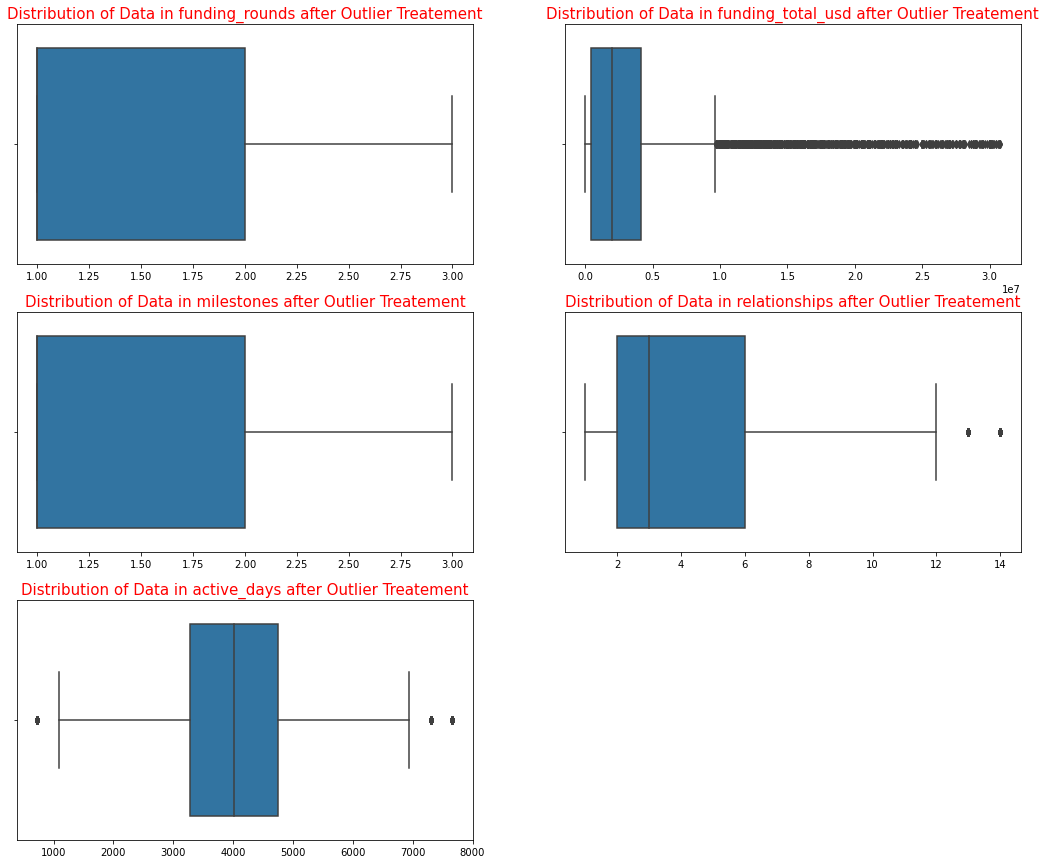

In [ ]:
plt.figure(figsize=(18,15))
for i, col in enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=col, data=df)
    plt.xlabel("")
    plt.title(f"Distribution of Data in {col} after Outlier Treatement", color='red',  fontsize=15);

### Check for duplicates and missing values and save this dataset for further analysis and model building.

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

category_code         0
status                0
founded_at            0
country_code          0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
lat                   0
lng                   0
active_days           0
dtype: int64

In [ ]:
df.to_csv('data/clean_data.csv', index=False)

In [ ]:
df.shape

(8713, 15)

<h3 style="color:blue;">Descriptive Statistics after data cleaning

In [ ]:
round(df.describe().T,2)

count        mean         std      min        25%  \
founded_at          8713.0     2009.19        3.02  1989.00    2008.00   
first_funding_at    8713.0     2010.74        2.16  1974.00    2010.00   
last_funding_at     8713.0     2011.34        1.96  1974.00    2011.00   
funding_rounds      8713.0        1.50        0.69     1.00       1.00   
funding_total_usd   8713.0  4083567.40  5761437.71   291.00  400000.00   
first_milestone_at  8713.0     2010.66        2.62  1976.00    2010.00   
last_milestone_at   8713.0     2011.20        2.45  1976.00    2011.00   
milestones          8713.0        1.47        0.65     1.00       1.00   
relationships       8713.0        4.25        2.98     1.00       2.00   
lat                 8713.0       38.40       14.73   -42.88      36.71   
lng                 8713.0      -58.84       66.51  -158.06    -118.49   
active_days         8713.0     4107.92     1254.72   730.00    3285.00   

                           50%         75%          max  
founded_at             2010.00     2011.00      2014.00  
first_funding_at       2011.00     2012.00      2013.00  
last_funding_at        2012.00     2013.00      2013.00  
funding_rounds            1.00        2.00         3.00  
funding_total_usd   2000000.00  4100000.00  30800000.00  
first_milestone_at     2011.00     2012.00      2014.00  
last_milestone_at      2012.00     2013.00      2014.00  
milestones                1.00        2.00         3.00  
relationships             3.00        6.00        14.00  
lat                      39.89       45.50        70.92  
lng                     -77.36       -0.13       174.78  
active_days            4015.00     4745.00      7665.00

In [ ]:
df.describe(include='object').T

count unique        top  freq
category_code  8713     16      other  1688
status         8713      2  operating  8189
country_code   8713     10        USA  5471

<h2 style="color:red;">Observations After Cleaning the Data: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. The average number of funding rounds is around 1.7(consider as 2), with a median (50th percentile) of 1. This suggests that a most of entities had only one funding round.<br>
    2. On average, these companies were founded in 2008, with a standard deviation of 5.15 years. The founding years range from a minimum of 1908 to a maximum of 2014..<br>
    3. Companies, on average, secured their first funding in 2010, with a standard deviation of 2.35 years. The earliest recorded first funding year is 1974, while the most recent is 2013.<br>
    4. The dataset shows an average last funding year of 2011, with a standard deviation of 2.09 years. The earliest recorded last funding year is 1974, and the latest is 2013.<br>
    6. On average, companies in our dataset underwent 1.70 funding rounds, with a standard deviation of 1.07. The number of funding rounds ranges from a minimum of 1 to a maximum of 15.<br>
    7. The average total funding for these companies is 5,028,844.56, with a notable standard deviation of 6,904,009.13. Funding amounts vary, starting from 291 and reaching as high as 33,600,000.<br>
    8. Companies, on average, achieved their first milestone in 2010, with a standard deviation of 2.89 years. The earliest recorded first milestone year is 1976, while the most recent is 2014.<br>
    9. The dataset shows an average last milestone year of 2011, with a standard deviation of 2.71 years. The earliest recorded last milestone year is 1976, and the latest is 2014.<br>
    10. On average, companies in our dataset accomplished 1.53 milestones, with a standard deviation of 0.74. The number of milestones ranges from a minimum of 1 to a maximum of 9.<br>
    11. Companies, on average, have 4.50 recorded relationships, with a standard deviation of 3.16. The number of relationships varies from a minimum of 1 to a maximum of 14.<br>
    12. Companies in our dataset have been active for an average of 4420 days, with a standard deviation of 2033.11. Active days range from 0 to 41245, with a median of 4015 days.</h4>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Exploratory Data Analysis 📈📉</h2>

In [ ]:
df=pd.read_csv("data/clean_data.csv")
df.head()

category_code     status  founded_at country_code  first_funding_at  \
0     cleantech  operating        2003          USA              2011   
1        mobile  operating        2003          AUS              2003   
2    enterprise  operating        2004          USA              2011   
3           web  operating        2006          USA              2007   
4     ecommerce  operating        2004          USA              2011   

   last_funding_at  funding_rounds  funding_total_usd  first_milestone_at  \
0             2012               3         10125293.0                2010   
1             2003               1           250000.0                2007   
2             2011               1          1500000.0                2010   
3             2007               1          2500000.0                2010   
4             2011               1          3800000.0                2012   

   last_milestone_at  milestones  relationships        lat         lng  \
0               2010           1              6  30.267153  -97.743061   
1               2007           1              2 -27.469771  153.025124   
2               2010           1              8  47.610150 -122.201516   
3               2012           2              7  37.774929 -122.419415   
4               2012           1              9  47.610150 -122.201516   

   active_days  
0       6570.0  
1       6570.0  
2       6205.0  
3       5475.0  
4       6205.0

<h2 style="color:red">1. Univariate Analysis</h2>

<h3 style="color:blue;">1.1. Count of Entities or companies in each category type.</h3>

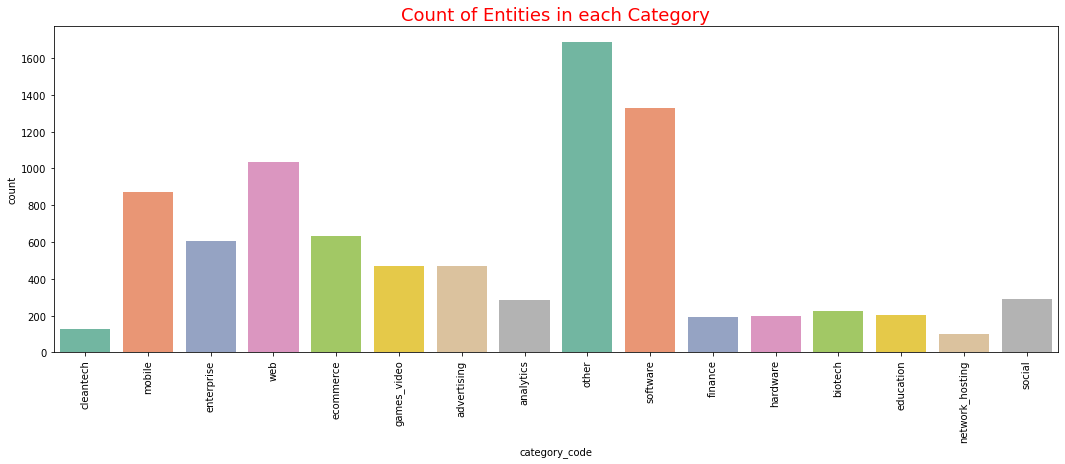

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='category_code', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title("Count of Entities in each Category", fontsize=18, color='red');

- The most frequently occurring category is "Other," representing 2,237 instances, indicating a diverse range of businesses.
Following closely is the "Software" category with 1,590 companies, emphasizing a significant presence in the software sector.

<h3 style="color:blue;">1.2. Analyzing Acquisition Status- The Target Variable.</h3>

Text(0.5, 1.0, 'Distribution of Companies by Category')

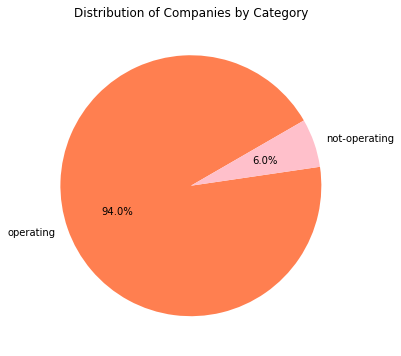

In [ ]:
status_counts=df['status'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(x=status_counts.values, labels=status_counts.index, colors=['coral','pink'],
            autopct='%1.1f%%', startangle=30, counterclock=True)
plt.title('Distribution of Companies by Category')

- While the majority of companies, constituting 94.0%, are currently operating, it's important to note a class imbalance, with only 6% categorized as not-operating.

### Data is highly Imbalanced.
Dealing with highly imbalanced data is a common challenge in machine learning, as it can lead models to be biased towards the majority class. Here are several techniques to use in case of imbalanced datasets:

1. **Resampling:**
   - **Under-sampling:** Reduce the number of instances in the majority class. This can be done randomly or using more advanced techniques like Tomek links or edited nearest neighbors.
   - **Over-sampling:** Increase the number of instances in the minority class. Techniques include random duplication, SMOTE (Synthetic Minority Over-sampling Technique), and ADASYN (Adaptive Synthetic Sampling).


2. **Synthetic Data Generation:**
   - **SMOTE (Synthetic Minority Over-sampling Technique):** It generates synthetic examples for the minority class by interpolating between existing minority class instances.
   - **ADASYN (Adaptive Synthetic Sampling):** Similar to SMOTE but adds synthetic examples proportionally to the density of the minority class.


3. **Ensemble Methods:**
   - Use ensemble methods like Random Forests, XGBoost, or AdaBoost, which can handle imbalanced datasets well. These models inherently provide a form of weighting to different classes.


4. **Different Evaluation Metrics:**
   - Instead of accuracy, use evaluation metrics that are more informative for imbalanced datasets, such as precision, recall, F1-score, or the area under the precision-recall curve.


5. **Algorithmic Approaches:**
   - Some algorithms are inherently more robust to imbalanced datasets. For example, decision trees and ensemble methods often perform well.

<h3 style="color:blue;">1.3. Analyzing Date Related column</h3>

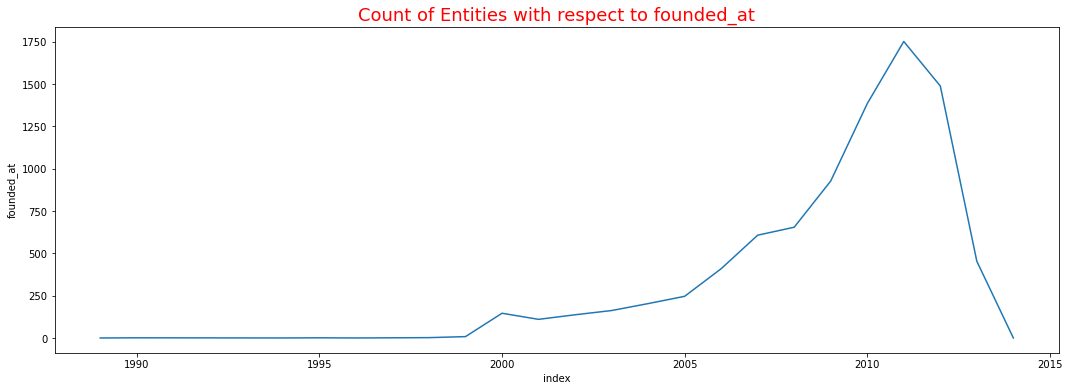

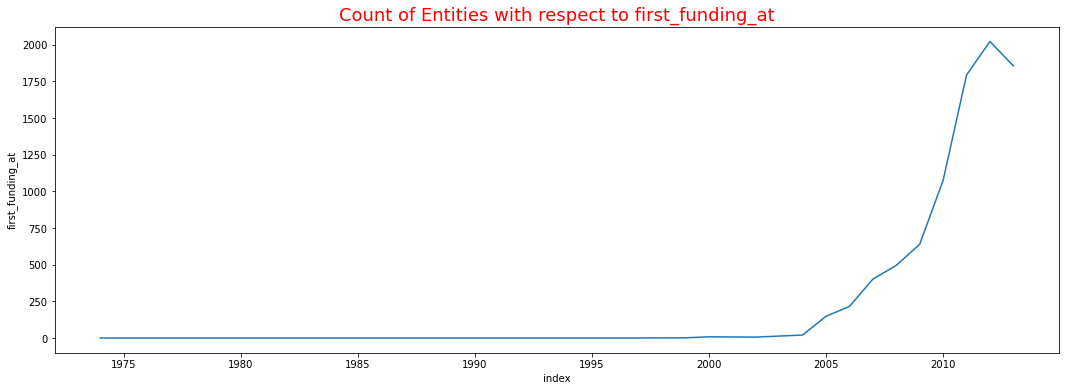

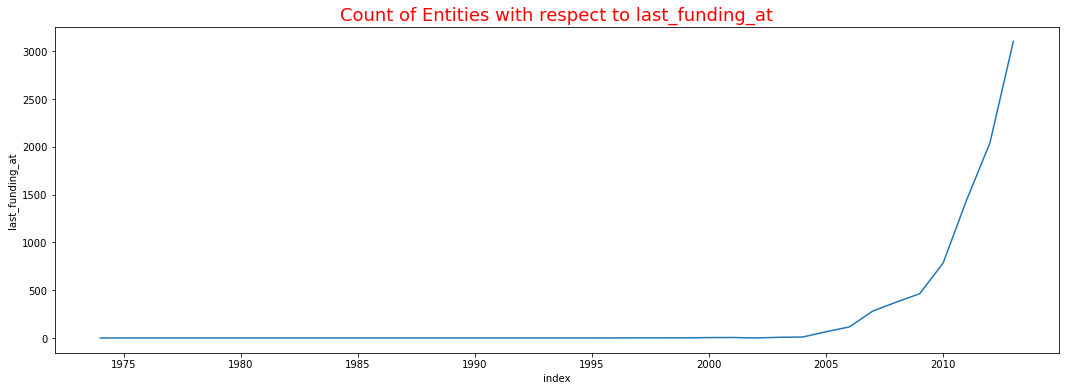

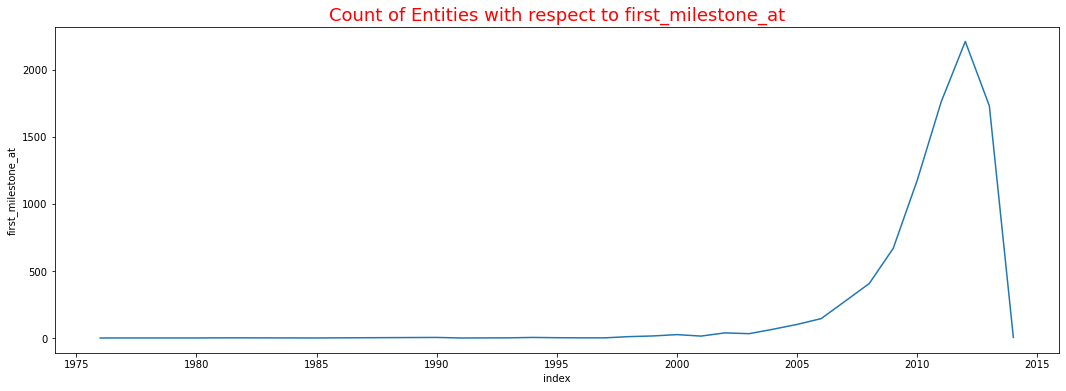

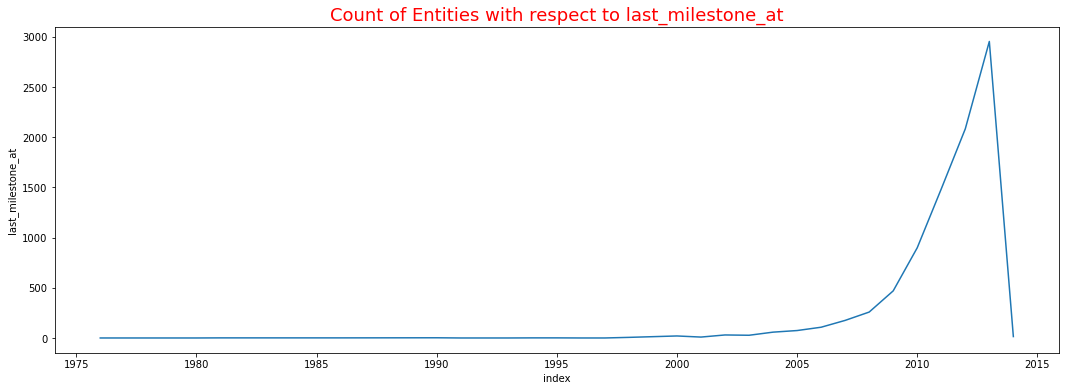

In [ ]:
date_columns=['founded_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at']

for col in date_columns:
    plt.figure(figsize=(18,6))
    data=df[col].value_counts().reset_index()
    sns.lineplot(x='index', y=col, data=data, palette='Set2')
    plt.title(f"Count of Entities with respect to {col}", fontsize=18, color='red');

- Trend is from earlist to newsest in all above date related columns. Most companies founded in 2011, most companies recieved their first funding in year 2012, maximum companies recieved last funding in the year 2013. Maximum companies reached their first milestone in 2012 and the last milestone is in the year 2013.

<h3 style="color:blue;">1.4. Analyzing Location of the companies.</h3>

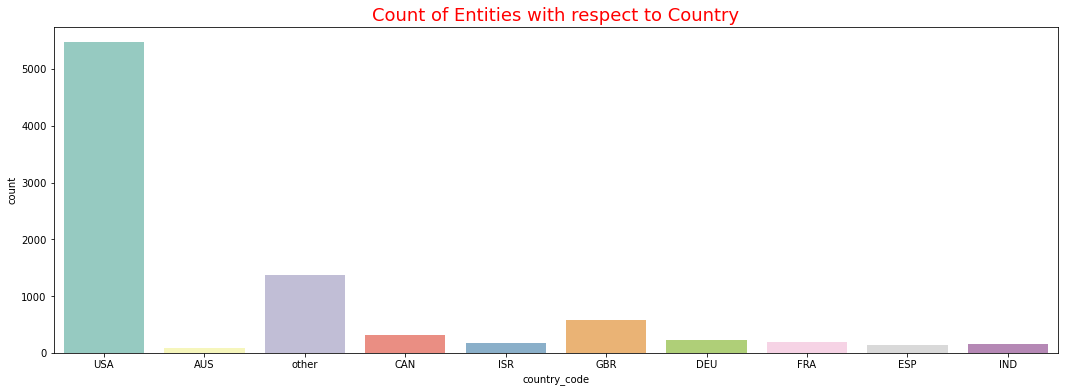

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_code', data=df, palette='Set3')
plt.title("Count of Entities with respect to Country", fontsize=18, color='red');

- Most of the entities or the copanies resides in USA, followed by Other country.

<h3 style="color:blue;">1.5. Analyzing Distribution of Numerical Columns</h3>

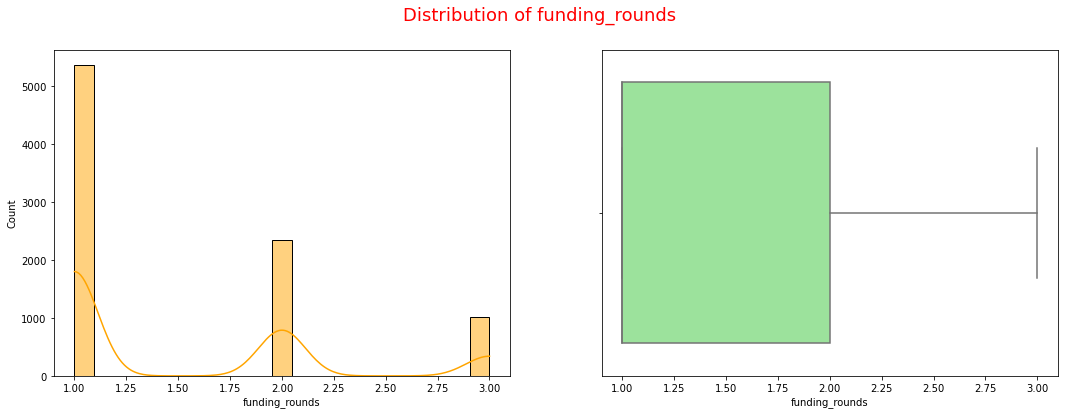

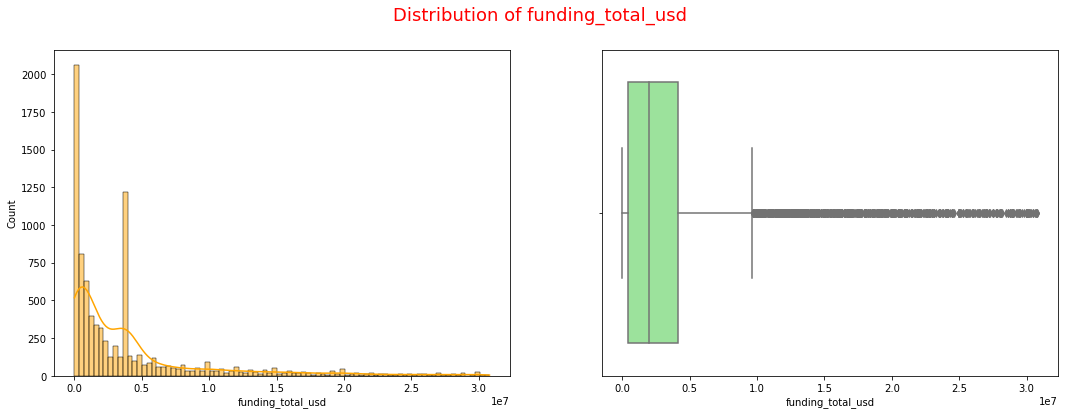

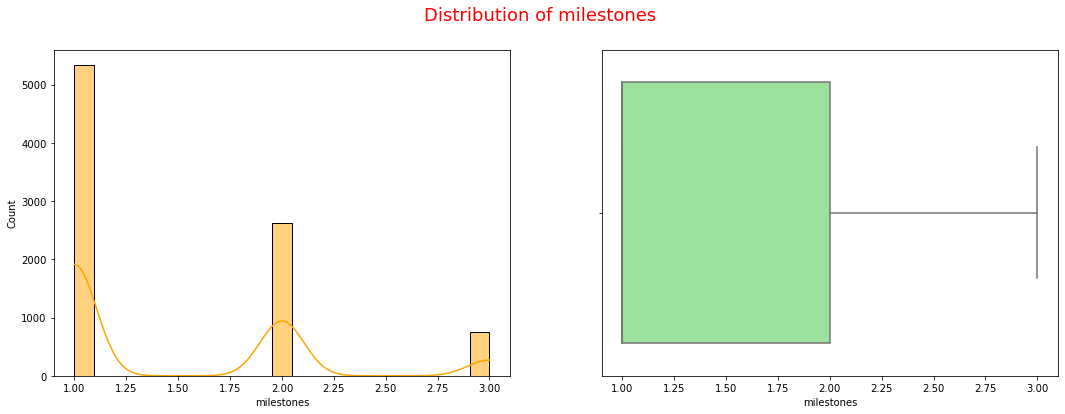

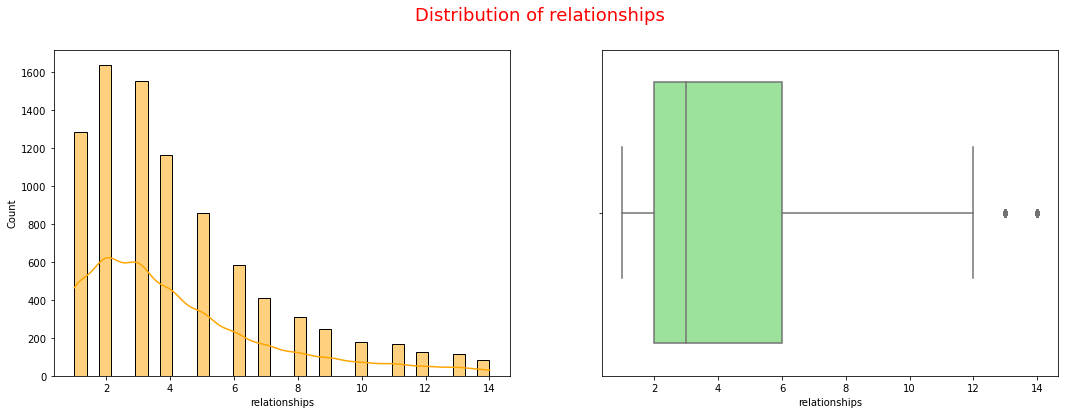

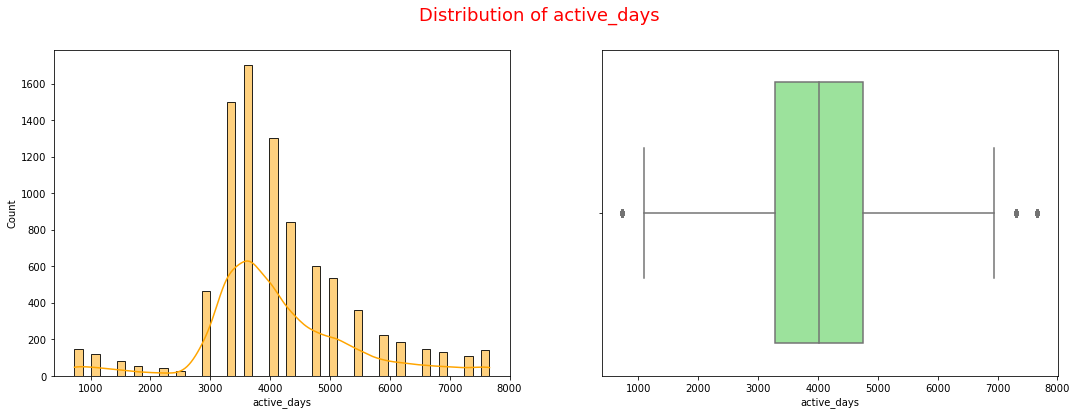

In [ ]:
num_cols=['funding_rounds','funding_total_usd','milestones', 'relationships','active_days']

for col in num_cols:
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    sns.histplot(x=col, data=df, kde=True, color='orange')

    plt.subplot(122)
    sns.boxplot(x=col, data=df, color='lightgreen')
    plt.suptitle(f"Distribution of {col}", fontsize=18, color='red');

- No large skewness in any numerical column.

<h2 style="color:red;">Observations on Univariate Analysis: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1.The most frequently occurring category is "Other," representing 2,237 instances, indicating a diverse range of businesses. Following closely is the "Software" category with 1,590 companies, emphasizing a significant presence in the software sector.<br>
    2. While the majority of companies, constituting 94.0%, are currently operating, it's important to note a class imbalance, with only 6.7% categorized as not-operating. Ensuring balanced representation in the dataset is key for robust model training and accurate predictive insights.<br>
    3. Trend is from earlist to newsest in all above date related columns. Most companies founded in 2011, most companies recieved their first funding in year 2012, maximum companies recieved last funding in the year 2013. Maximum companies reached their first milestone in 2012 and the last milestone is in the year 2013.<br>
    4. Distribution of Numerical column is not skewed, that means data is free of outliers.<br>
    5. Most of the entities or the copanies resides in USA, followed by Other country. </h4>

<h2 style="color:red">2. Bivariate Analysis</h2>

<h3 style="color:blue">2.1. Distribution of Numerical Column wrt Status</h3>

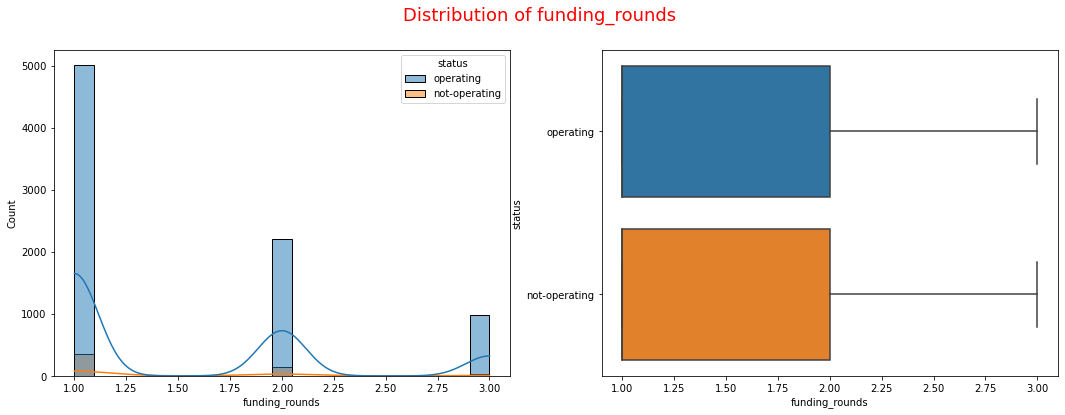

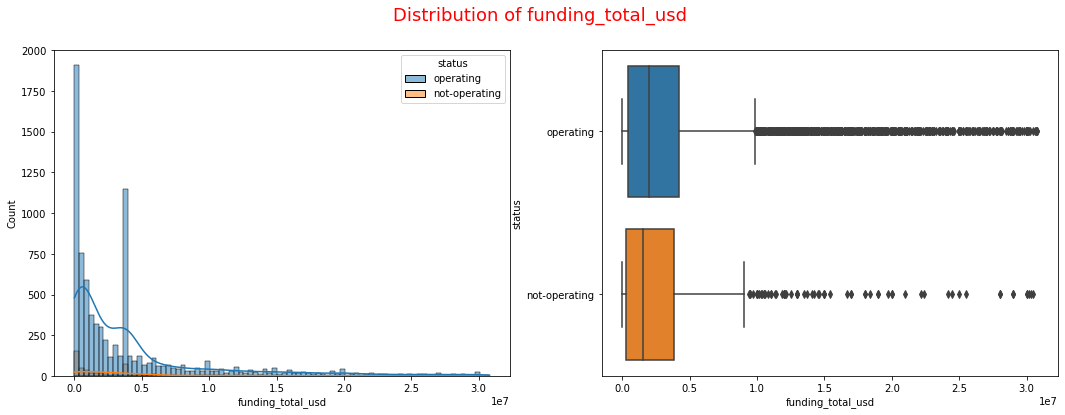

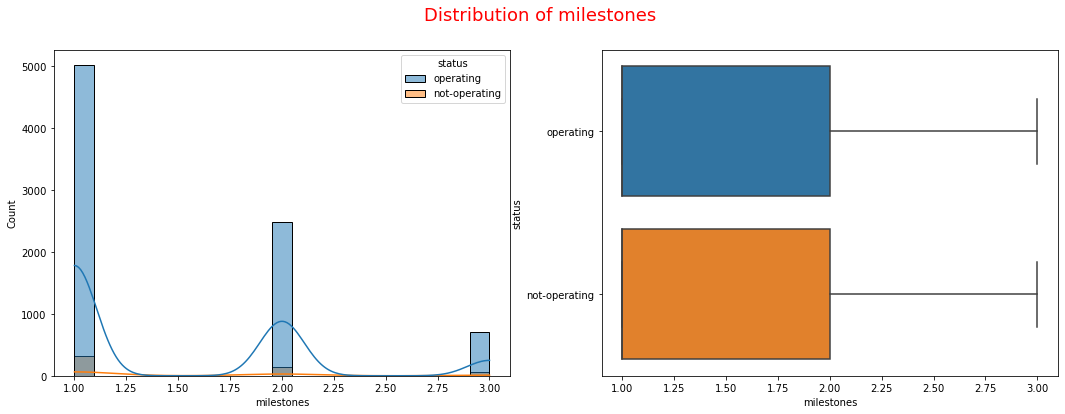

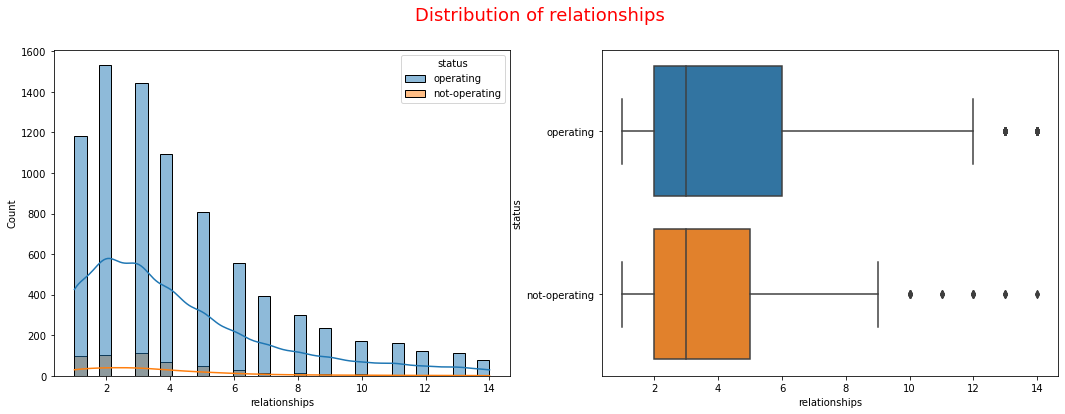

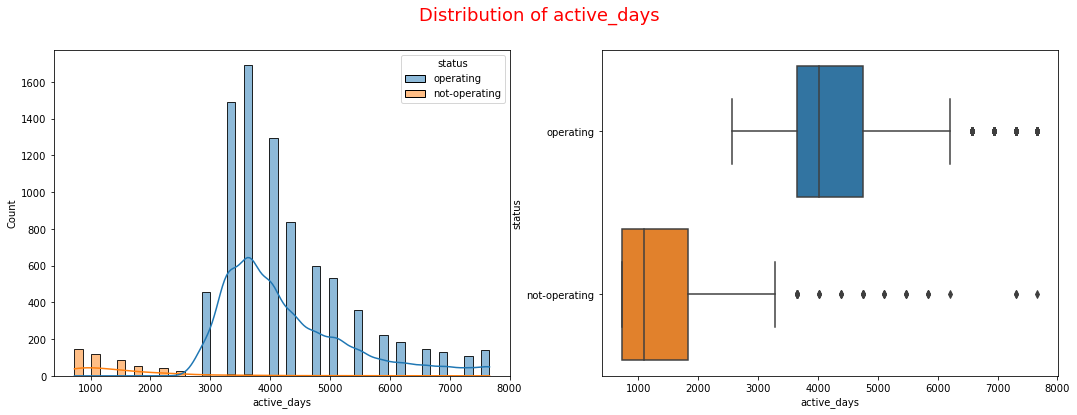

In [ ]:
num_cols=['funding_rounds','funding_total_usd','milestones', 'relationships','active_days']

for col in num_cols:
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    sns.histplot(x=col, hue='status', data=df, kde=True)

    plt.subplot(122)
    sns.boxplot(x=col, y='status', data=df)
    plt.suptitle(f"Distribution of {col}", fontsize=18, color='red');

- Only the "active_days" column can helpful to distinguish the target classes.

<h3 style="color:blue">2.2. Percentage of Status of the companies by Country.</h3>

In [ ]:
status_by_country=pd.crosstab(index=df['country_code'], columns=df['status'])
status_by_country['%_of_not-operating']=round(status_by_country['not-operating']/(status_by_country['operating']+
                                                                                  status_by_country['not-operating'])*100,2)
status_by_country['%_of_operating']=round(status_by_country['operating']/(status_by_country['operating']+
                                                                          status_by_country['not-operating'])*100,2)
status_by_country

status        not-operating  operating  %_of_not-operating  %_of_operating
country_code                                                              
AUS                       4         88                4.35           95.65
CAN                      18        298                5.70           94.30
DEU                      14        219                6.01           93.99
ESP                       3        135                2.17           97.83
FRA                      10        188                5.05           94.95
GBR                      29        542                5.08           94.92
IND                       5        148                3.27           96.73
ISR                      12        156                7.14           92.86
USA                     352       5119                6.43           93.57
other                    77       1296                5.61           94.39

- In every country more the 92% of the companies are in operating condition. Only Spain has over 97.83% operating and 2.17% non-operating companies. Israil has 7.14% non-operating companies.

<h3 style="color:blue">2.3. Percentage of Status of the companies by Category.</h3>

In [ ]:
status_by_category=pd.crosstab(index=df['category_code'], columns=df['status'])
status_by_category['%_of_not-operating']=round(status_by_category['not-operating']/(status_by_category['operating']+
                                                                                  status_by_category['not-operating'])*100,2)
status_by_category['%_of_operating']=round(status_by_category['operating']/(status_by_category['operating']+
                                                                          status_by_category['not-operating'])*100,2)
status_by_category

status           not-operating  operating  %_of_not-operating  %_of_operating
category_code                                                                
advertising                 24        448                5.08           94.92
analytics                    2        284                0.70           99.30
biotech                      7        217                3.12           96.88
cleantech                    5        120                4.00           96.00
ecommerce                   45        586                7.13           92.87
education                    1        200                0.50           99.50
enterprise                  21        587                3.45           96.55
finance                      7        185                3.65           96.35
games_video                 49        421               10.43           89.57
hardware                    14        182                7.14           92.86
mobile                      46        824                5.29           94.71
network_hosting             12         88               12.00           88.00
other                       87       1601                5.15           94.85
social                      16        275                5.50           94.50
software                    70       1256                5.28           94.72
web                        118        915               11.42           88.58

- Over more than 10% of "Network_Hosting", "Web" and "Games_Video" category companies are in'non-operating' condition. More than 99% of "Analytics" and "Education" type companies are in 'operating' condition.

<h3 style="color:blue">2.4. Realtionship Between "funding_total_usd" and "active_days".

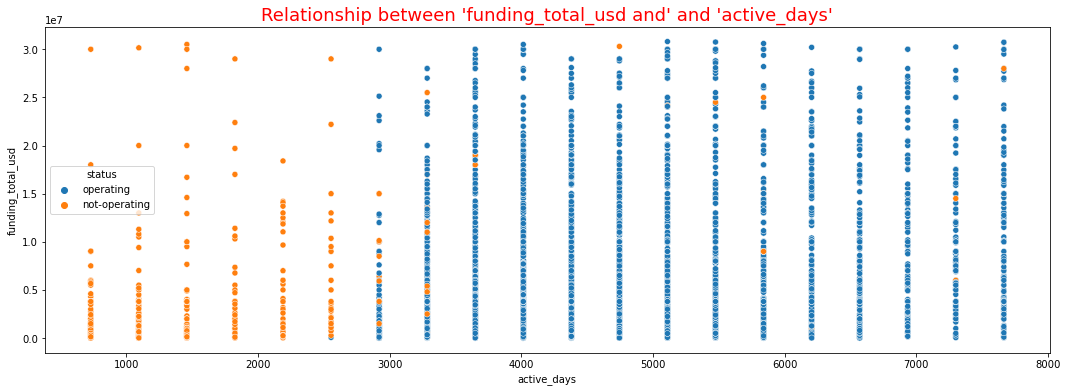

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='active_days', y='funding_total_usd', hue='status', data=df)
plt.title("Relationship between 'funding_total_usd and' and 'active_days'", fontsize=18, color='red');

- We can see clear relationship between 'active_days' of the company and 'total_funding_usd'. "Non-Operating" companies got less funding than the "operating" companies. Only finger counting companies are in 'non-operating' condition even recieving large amount of finding. Most of the 'non-operating' companies are 'active' only for maximum of 2800 Days.

<h3 style="color:blue">2.5. Operating Status of the companies by Date Column.

<h3 style="color:blue">2.5.1. Operating Status of the companies by 'founded_at' Column.

In [ ]:
status_by_founded_at=pd.crosstab(index=df['founded_at'], columns=df['status'])
status_by_founded_at['%_of_not-operating']=round(status_by_founded_at['not-operating']/(status_by_founded_at['operating']+
                                                                                  status_by_founded_at['not-operating'])*100,2)
status_by_founded_at['%_of_operating']=round(status_by_founded_at['operating']/(status_by_founded_at['operating']+
                                                                          status_by_founded_at['not-operating'])*100,2)
status_by_founded_at

status      not-operating  operating  %_of_not-operating  %_of_operating
founded_at                                                              
1989                    1          0              100.00            0.00
1990                    2          0              100.00            0.00
1994                    1          0              100.00            0.00
1995                    2          0              100.00            0.00
1996                    1          0              100.00            0.00
1997                    2          0              100.00            0.00
1998                    3          0              100.00            0.00
1999                    9          0              100.00            0.00
2000                    6        141                4.08           95.92
2001                    4        107                3.60           96.40
2002                    7        131                5.07           94.93
2003                   15        148                9.20           90.80
2004                   22        182               10.78           89.22
2005                   27        220               10.93           89.07
2006                   51        359               12.44           87.56
2007                   76        532               12.50           87.50
2008                   57        598                8.70           91.30
2009                   89        839                9.59           90.41
2010                   88       1297                6.35           93.65
2011                   61       1691                3.48           96.52
2012                    0       1489                0.00          100.00
2013                    0        454                0.00          100.00
2014                    0          1                0.00          100.00

- All Companies which are founded between year "1989 to 1999" are 'non-operating'. And all companies which are founded in 2012, 2013 and 2014 are in 'operating' condition.

<h3 style="color:blue">2.5.2. Operating Status of the companies by 'first_funding_at' and 'last_funding_at' Column.

In [ ]:
status_by_first_funding_at=pd.crosstab(index=df['first_funding_at'], columns=df['status']).T
status_by_first_funding_at

first_funding_at  1974  1994  1997  1999  2000  2001  2002  2003  2004  2005  \
status                                                                         
not-operating        0     0     0     2     0     0     1     1     3    21   
operating            1     1     1     0     9     8     6    13    18   128   

first_funding_at  2006  2007  2008  2009  2010  2011  2012  2013  
status                                                            
not-operating       32    75    84   101   101    79    22     2  
operating          184   327   412   539   974  1714  2000  1854

In [ ]:
status_by_last_funding_at=pd.crosstab(index=df['last_funding_at'], columns=df['status']).T
status_by_last_funding_at

last_funding_at  1974  1994  1999  2000  2001  2002  2003  2004  2005  2006  \
status                                                                        
not-operating       0     0     2     0     0     0     0     0    10    21   
operating           1     1     0     5     6     1     8    11    56    96   

last_funding_at  2007  2008  2009  2010  2011  2012  2013  
status                                                     
not-operating      64    79    90   115    93    47     3  
operating         219   297   374   670  1349  1995  3100

- There is single company in year 1974, 1994 which got first and last funding in the same year and still in 'operating' condition.

<h3 style="color:blue">2.5.3. Operating Status of the companies by 'first_milestone_at' and 'last_milestone_at Column.

In [ ]:
status_by_first_milestone_at=pd.crosstab(index=df['first_milestone_at'], columns=df['status']).T
status_by_first_milestone_at

first_milestone_at  1976  1978  1980  1981  1982  1985  1986  1990  1991  \
status                                                                     
not-operating          0     0     0     0     0     0     0     0     0   
operating              1     1     1     2     2     1     2     5     1   

first_milestone_at  1993  1994  1995  1996  1997  1998  1999  2000  2001  \
status                                                                     
not-operating          0     0     0     0     0     2     3     2     2   
operating              2     5     3     2     2     9    13    24    13   

first_milestone_at  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
status                                                                     
not-operating          5     1    12    12    30    48    71    94   135   
operating             34    32    54    90   115   227   335   574  1041   

first_milestone_at  2011  2012  2013  2014  
status                                      
not-operating         79    25     3     0  
operating           1682  2184  1727     5

In [ ]:
status_by_last_milestone_at=pd.crosstab(index=df['last_milestone_at'], columns=df['status']).T
status_by_last_milestone_at

last_milestone_at  1976  1978  1980  1981  1982  1986  1990  1991  1993  1994  \
status                                                                          
not-operating         0     0     0     0     0     0     0     0     0     0   
operating             1     1     1     2     2     2     3     1     1     2   

last_milestone_at  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  \
status                                                                          
not-operating         0     0     0     1     3     1     2     4     1     8   
operating             2     1     1     6    11    20     8    27    27    51   

last_milestone_at  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  
status                                                                         
not-operating         7    23    30    46    82   124   115    48    29     0  
operating            68    85   146   213   388   775  1370  2035  2924    15

- All Companies who reached their 'first and last milestone' between year 1976 to 1997' are in 'operating' condition. There is only one year in 21st century (2014) where all the companies reached their first and last milestone are still in operation.

<h3 style="color:blue">2.6. Location wise status of acquisition.</h3>

In [ ]:
fig = px.scatter_geo(df, lat='lat', lon='lng',color='status',
                     hover_name='country_code', hover_data='status',
                     title='Companies or Entities by Longitude and Latitude And Status',
                     projection='equirectangular')

fig.show()

- From map we can easily see the count of companies are more in USA and Western Europe countries.

<h3 style="color:blue">2.7. Count of Type of Company in Each Country.</h3>

In [ ]:
pd.crosstab(index=df['category_code'], columns=df['country_code']).T

category_code  advertising  analytics  biotech  cleantech  ecommerce  \
country_code                                                           
AUS                      6          0        1          0          8   
CAN                     24         11        8          4         14   
DEU                      9          6        4          4         21   
ESP                      7          2        2          0         25   
FRA                     11          5        3          0         25   
GBR                     29         19        8          9         50   
IND                      6          4        1          3         22   
ISR                     13          9        1          2          9   
USA                    289        193      173         92        313   
other                   78         37       23         11        144   

category_code  education  enterprise  finance  games_video  hardware  mobile  \
country_code                                                                   
AUS                    3           7        0            7         3      14   
CAN                    7          29        4           18        11      29   
DEU                    4          11        6           16         3      33   
ESP                    2           8        4            8         2      10   
FRA                    2          13        2            9         3      19   
GBR                    4          36       16           39         8      54   
IND                    8           9        4            3         3      12   
ISR                    3          15        1           16         2      20   
USA                  141         410      120          272       138     525   
other                 27          70       35           82        23     154   

category_code  network_hosting  other  social  software  web  
country_code                                                  
AUS                          2     16       5         8   12  
CAN                          3     41      11        63   39  
DEU                          3     50       6        33   24  
ESP                          3     27      11        15   12  
FRA                          4     31       6        39   26  
GBR                         10    124      19        75   71  
IND                          0     30       3        23   22  
ISR                          3     31       7        21   15  
USA                         59   1070     151       869  656  
other                       13    268      72       180  156

### Useful Insights from above cross tabular report:
1. The USA has the highest number of companies across almost all categories. Other countries, such as the United Kingdom (GBR) and Canada (CAN), also have a significant presence in various categories.
2. "Software" and "E-commerce" are among the most popular categories across all countries, with the USA leading in these sectors. The "Other" category also shows notable activity, suggesting a diverse range of industries or startups.
3. Some countries exhibit specialization in specific categories; for example, Israel (ISR) has a relatively higher concentration in "Enterprise" and "Security."
4. Categories like "Biotech," "Cleantech," and "Analytics" have a presence across different countries, indicating a focus on emerging and innovative technologies.

<h3 style="color:blue">2.8. Which country secured the highest number of funding rounds?</h3>

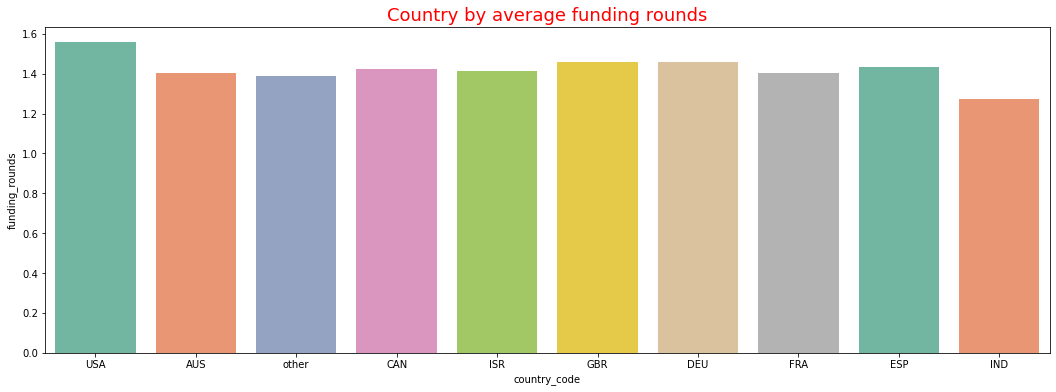

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='country_code', y='funding_rounds', data=df, ci=None, palette='Set2')
plt.title("Country by average funding rounds", fontsize=18, color='red');

- The United States (USA) stands out with the highest average number of funding rounds per company (approximately 1.56).
- Emerging market India (IND) shows least average funding rounds per company of approximately 1.27.

<h3 style="color:blue">2.9. Funding totals in USD categorized by country.</h3>

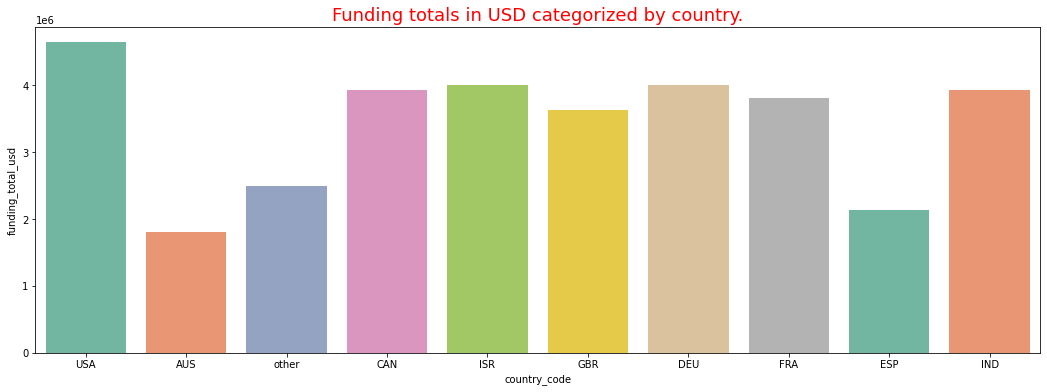

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='country_code', y='funding_total_usd', data=df, ci=None, palette='Set2')
plt.title("Funding totals in USD categorized by country.", fontsize=18, color='red');

- The United States (USA) is the top recipient of funding, with a total of $4.64 million USD. Australia (AUS) and Spain (ESP)  have least average funding totals.

<h3 style="color:blue">2.10. Milenstones achieved and average businees relationships categorized by country.</h3>

In [ ]:
pd.pivot_table(data=df, index='country_code',
               values=['milestones','relationships']).sort_values(by='milestones').round(2).T

country_code    IND   ESP   FRA  other   AUS   DEU   CAN   ISR   GBR   USA
milestones     1.25  1.34  1.39   1.40  1.40  1.41  1.44  1.45  1.48  1.51
relationships  3.21  3.25  3.29   3.54  3.72  3.18  4.07  4.06  3.93  4.62

- India (IND) has the least average number of milestones per company (1.25), USA has highest number of milestones(1.51) and also the maximum relationships with businesess(4.62) per company.

<h3 style="color:blue">2.11. "The average active days of the company vary by country."</h3>

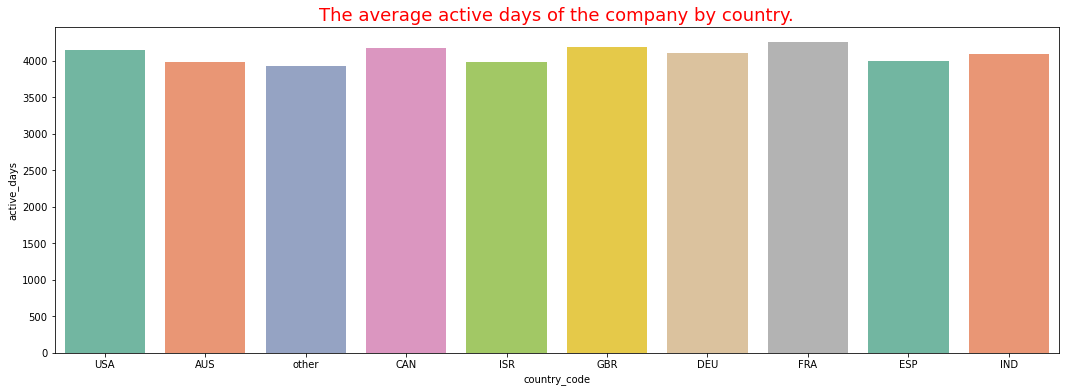

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='country_code', y='active_days', data=df, ci=None, palette='Set2')
plt.title("The average active days of the company by country.", fontsize=18, color='red');

- Companies in France (FRA) and the United Kingdom (GBR) demonstrate longer active days, with values of 4252.80 and 4181.84, respectively. This suggests a potentially longer operational longevity.

<h3 style="color:blue">2.12. Which category company secured the highest number of funding rounds?.</h3>

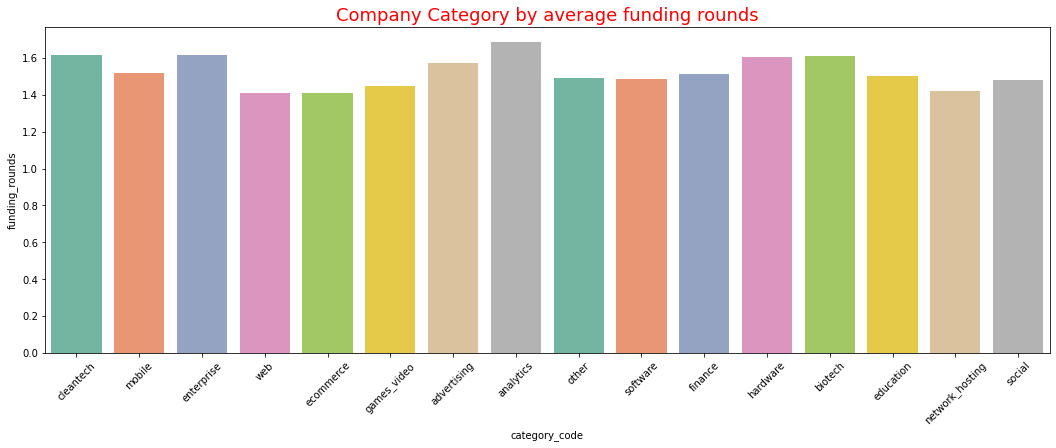

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='category_code', y='funding_rounds', data=df, ci=None, palette='Set2')
plt.xticks(rotation=45)
plt.title("Company Category by average funding rounds", fontsize=18, color='red');

- The Analytics compananies stands out with the highest average number of funding rounds per company (approximately 1.7).
- Web category companies shows least average funding rounds per company of approximately 1.4.

<h3 style="color:blue">2.13. Funding totals in USD categorized by company type.</h3>

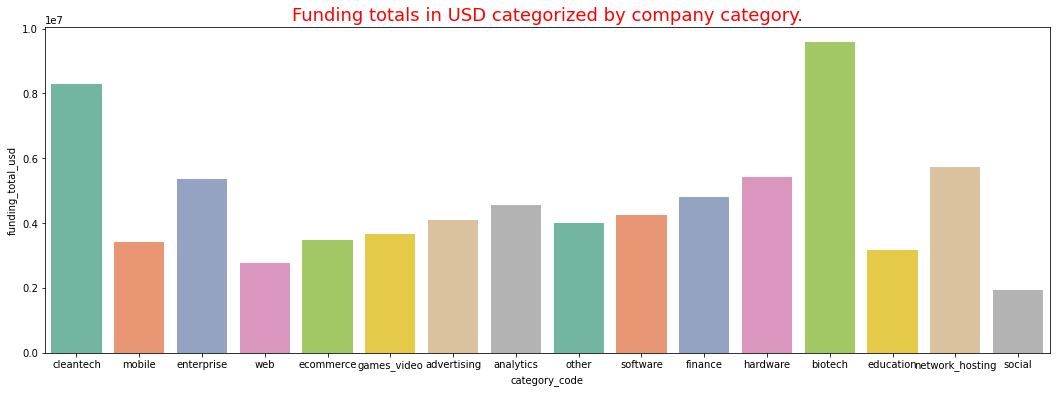

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='category_code', y='funding_total_usd', data=df, ci=None, palette='Set2')
plt.title("Funding totals in USD categorized by company category.", fontsize=18, color='red');

- Maximum average funding recieved by BioTech" followed by "DeanTech" companies and Least average funding is by "Social" companies.

<h3 style="color:blue">2.14. Milenstones achieved and average businees relationships categorized by company category.

In [ ]:
pd.pivot_table(data=df, index='category_code',
               values=['milestones','relationships']).sort_values(by='milestones').round(2)

milestones  relationships
category_code                             
biotech                1.14           4.18
cleantech              1.27           3.98
hardware               1.35           3.54
ecommerce              1.36           3.65
software               1.42           4.36
other                  1.44           4.00
network_hosting        1.44           4.39
social                 1.45           3.72
education              1.46           3.93
analytics              1.55           4.95
advertising            1.55           5.05
enterprise             1.55           5.16
mobile                 1.55           4.26
finance                1.56           4.54
games_video            1.57           4.03
web                    1.59           4.20

- Web copanies reached more "milestones" (1.59) and Biotech reached least milestones (1.14) per company. Enterprise companies has more relationships (5.16) per company and Hardwares has least relationships(3.54) per company.

<h3 style="color:blue">2.15. "The average active days of the company vary by each category company."

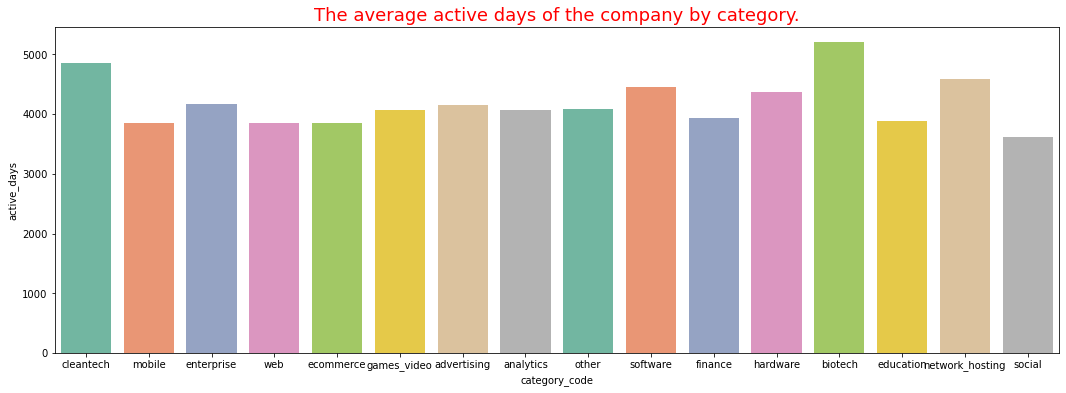

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='category_code', y='active_days', data=df, ci=None, palette='Set2')
plt.title("The average active days of the company by category.", fontsize=18, color='red');

- "BioTech" followed by "DeanTech" companies "operating most days" and Least operating companies belongs to "Social" category.

<h3 style="color:blue">2.16. Funding in USD by Countries and Status</h3>

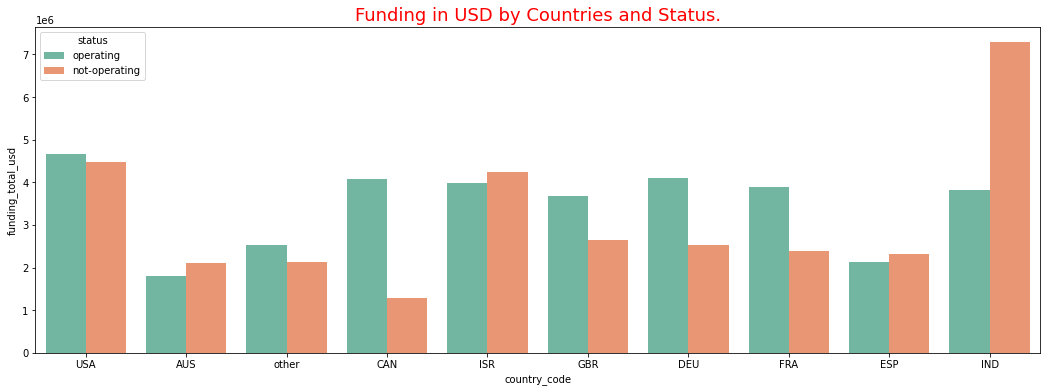

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='country_code', y='funding_total_usd', hue='status', data=df, ci=None, palette='Set2')
plt.title("Funding in USD by Countries and Status.", fontsize=18, color='red');

- In India most average funding recieved by non-operating companies than operating companies, Same in case of Isril, Spain and Australia.

<h3 style="color:blue">2.17. Funding in USD by Categories and Status</h3>

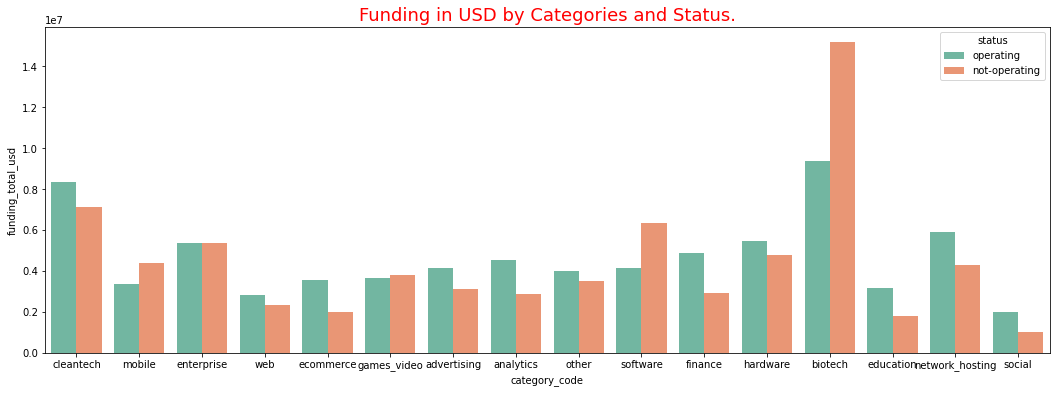

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='category_code', y='funding_total_usd', hue='status', data=df, ci=None, palette='Set2')
plt.title("Funding in USD by Categories and Status.", fontsize=18, color='red');

- "Biotech", "Games Videos", "Softwares" and "Mobile" companies who are not-operating have high funding than operating companies.

<h2 style="color:red;">Observations on Bivariate Analysis: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. Only the "active_days" column can helpful to distinguish the target classes..<br>
    2. In every country more the 92% of the companies are in operating condition. Only Spain has over 97.83% operating and 2.17% non-operating companies. Israil has 7.14% non-operating companies.<br>
    3. We can see clear relationship between 'active_days' of the company and 'total_funding_usd'. "Non-Operating" companies got less funding than the "operating" companies. Only finger counting companies are in 'non-operating' condition even after recieving large amount of finding. Most of the 'non-operating' companies are 'active' only for maximum of 2800 Days. This will be deciding factor.<br>
    4. Over more than 10% of "Network_Hosting", "Web" and "Games_Video" category companies are in'non-operating' condition. More than 99% of "Analytics" and "Education" type companies are in 'operating' condition.<br>
    5. All Companies which are founded between year "1989 to 1999" are 'non-operating'. And all companies which are founded in 2012, 2013 and 2014 are in 'operating' condition.<br>
    6. There is single company which got first and last funding in the same year 19976 and 1994 and still in 'operating' condition.<br>
    7. All Companies who reached their 'first and last milestone' between year 1976 to 1997' are in 'operating' condition. There is only one year in 21st century (2014) where all the companies reached their first and last milestone are still in operation.<br>
    8. The USA has the highest number of companies across almost all categories. Other countries, such as the United Kingdom (GBR) and Canada (CAN), also have a significant presence in various categories.<br>
    9. "Software" and "E-commerce" are among the most popular categories across all countries, with the USA leading in these sectors. The "Other" category also shows notable activity, suggesting a diverse range of industries or startups.<br>
    10. Some countries exhibit specialization in specific categories; for example, Israel (ISR) has a relatively higher concentration in "Enterprise" and "Security."<br>
    11. Categories like "Biotech," "Cleantech," and "Analytics" have a presence across different countries, indicating a focus on emerging and innovative technologies.<br>
    12. The United States (USA) stands out with the highest average number of funding rounds per company (approximately 1.56). Emerging market India (IND) shows least average funding rounds per company of approximately 1.27.<br>
    13. The United States (USA) is the top recipient of funding, with a total of $4.64 million USD. Australia (AUS) and Spain (ESP)  have least average funding totals.<br>
    14. India (IND) has the least average number of milestones per company (1.25), USA has highest number of milestones(1.51) and also the maximum relationships with businesess(4.62) per company.<br>
    15. Companies in France (FRA) and the United Kingdom (GBR) demonstrate longer active days, with values of 4252.80 and 4181.84, respectively. This suggests a potentially longer operational longevity.<br>
    16. The Analytics compananies stands out with the highest average number of funding rounds per company (approximately 1.7).
Web category companies shows least average funding rounds per company of approximately (1.4).<br>
    17. Maximum average funding recieved by BioTech" companies and Least average funding is by "Social" companies.<br>
    18. "BioTech" followed by "DeanTech" companies "operating most days" and Least operating companies belongs to "Social" category.<br>
    19. Web copanies reached more "milestones" (1.59) and Biotech reached least milestones (1.14) per company. Enterprise companies has more relationships (5.16) per company and Hardwares has least relationships(3.54) per company.
    20. "Biotech", "Games Videos", "Softwares" and "Mobile" companies who are not-operating have high funding than operating companies. In India most average funding recieved by non-operating companies than operating companies, Same in case of Isril, Spain and Australia.</h4>

<h2 style="color:red">3. Multivariate Analysis</h2>

<h3 style="color:blue">3.1. Correlation Matrix</h3>

In [ ]:
df.rename({'status':'isClosed'}, axis=1, inplace=True)
df['isClosed'].replace({'operating':0,'not-operating':1}, inplace=True)

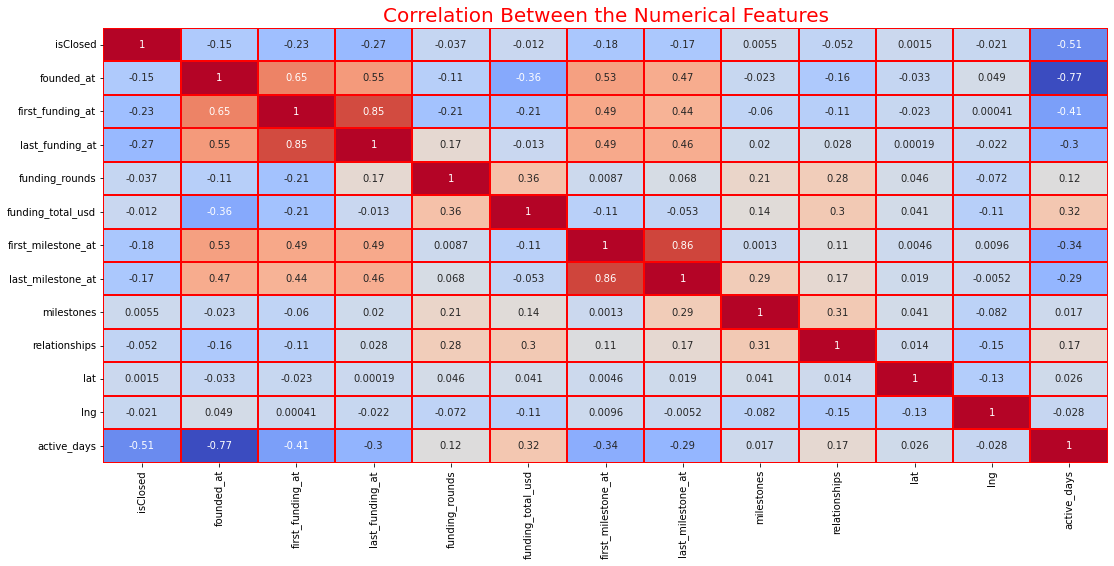

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', cbar=False,
            linecolor='red', linewidth=2)
plt.title("Correlation Between the Numerical Features", fontsize=20, color='red');

- The stronger negative correlations (closer to -1) with "isClosed" are observed for active_days, last_funding_at, first_funding_at, and founded_at.
- The weaker negative correlations (closer to 0) include milestones, relationships, funding_rounds, funding_total_usd.
- The positive correlations (although weak) are seen with lat, lng, and milestones.

<h2 style="color:red;">Observations on Multivariate Analysis: 🕵️‍♀️🕵️‍♀️</h2>
<h4 style="color:coral; line-height:2">1. "founded_at" (-0.152490): Companies that were founded more recently tend to be less likely to be closed.<br>
    2. "first_funding_at" (-0.232313): Companies that received their first funding later are less likely to be closed.<br>
    3. "last_funding_at" (-0.270808): Companies with more recent last funding rounds are less likely to be closed.<br>
    4. "active_days" (-0.505077): Longer active days are associated with a lower likelihood of closure.<br>
    5. "funding_rounds" (-0.036678): A slightly positive correlation suggests that a higher number of funding rounds is associated with a slightly higher likelihood of closure.<br>
    6. "funding_total_usd" (-0.011791): A slightly positive correlation suggests that higher total funding is associated with a slightly higher likelihood of closure.<br>
    7. "first_milestone_at" and "last_milestone_at" have negative correlations with "isClosed," indicating that companies achieving milestones more recently are less likely to be closed.<br>
    8. "relationships" has a negative correlation with "isClosed," suggesting that companies with more relationships are less likely to be closed.<br>
    9. "lat" and "lng" have relatively weak correlations with "isClosed." The geographic location may not strongly predict closure.<br>
    10. "milestones" has a positive correlation with "relationships," suggesting that companies with more relationships tend to achieve more milestones.</h4>

<h2 style="color:blue; background:lightgreen;line-height:2; text-align:center;">Feature Engineering 🎭🔩</h2>

There are two techniques employed in the feature engineering process to enhance the performance of machine learning models.
1. Feature Selection
2. Feature Reduction,


### I. Feature Selection:

Feature selection involves choosing a subset of the most relevant features from the original set of features. The goal is to retain the most informative variables while discarding irrelevant or redundant ones. Feature selection can improve model interpretability, reduce overfitting, and enhance computational efficiency.

**Feature Selection Techniques:**

1. **Correlation Analysis:**
   - Identify and remove highly correlated features. If two features are strongly correlated, keeping both may not provide much additional information to the model.


2. **Univariate Feature Selection:**
   - Use statistical tests like chi-squared tests, ANOVA, or mutual information to rank features based on their individual significance with the target variable. Select the top-ranked features.


3. **Wrapper Methods:**
   - Implement wrapper methods such as Recursive Feature Elimination (RFE) or forward/backward selection. These methods evaluate subsets of features based on their impact on model performance.


4. **Embedded Methods:**
   - Utilize models with built-in feature selection capabilities, such as LASSO (Least Absolute Shrinkage and Selection Operator) or decision trees. These models penalize or prune less important features during training.


5. **Feature Importance from Tree-based Models:**
   - Employ tree-based models like Random Forest or Gradient Boosted Trees and examine feature importance scores. Features with higher importance contribute more to the model's predictive power.



### II. Feature Reduction:

Feature reduction involves transforming the original set of features into a lower-dimensional representation while preserving as much information as possible. This reduction in dimensionality can help mitigate the curse of dimensionality, improve model efficiency, and potentially enhance model generalization.

**Feature Reduction Techniques:**

1. **Principal Component Analysis (PCA):**
    - Transform the original features into a new set of uncorrelated features (principal components) that retain most of the variance in the data.Reducing multicollinearity and dimensionality.


2. **Feature Selection with Mutual Information:**
    - Calculate the mutual information between each feature and the target variable. Select or eliminate features based on their relevance. Focus on features that provide the most information about the target.


3. **Recursive Feature Elimination (RFE):**
    - Train a model iteratively, eliminating the least important features at each step. Used with models that provide feature importance scores.


4.  **Tree-based Feature Importance:**
    - Evaluate the importance of features using decision trees or ensemble methods like Random Forest. Select features based on their contribution to the model.


5. **Variance Thresholding:**
    - Remove features with low variance, assuming they contain less information. Suitable for datasets with features that do not vary much.


6. **LASSO (Least Absolute Shrinkage and Selection Operator):**
    - Introduce L1 regularization during model training to shrink some coefficients to exactly zero. Encourage sparsity and feature selection in linear models.


7. **Manifold Learning (e.g., t-SNE, UMAP):**
     - Non-linear dimensionality reduction techniques preserving the intrinsic geometry of the data. Useful for visualizing high-dimensional data.

Both feature creation and feature reduction are essential for building effective machine learning models. Feature creation enhances the information content of the dataset, while feature reduction ensures that the model is not overwhelmed by irrelevant or redundant features. The choice of techniques depends on the nature of the data and the requirements of the modeling task.

### In this project we are going to use 3 techniques to select best features that leads to better model accuracy.
1. Correlation Analysis & Multico-linearity
2. PCA Technique
3. Mutual Information Technique

**------------------------------------------------------------------------------------------------------------------------------------------------**

### 1 .  Correlation Analysis and Multi-colinearity
**1. Correlation:**<br>
Correlation measures the statistical association between two or more variables. It quantifies the degree to which changes in one variable are associated with changes in another. The Pearson correlation coefficient, denoted by `r`, is a common measure of linear correlation and ranges from -1 to 1:
- `r = 1`: Perfect positive correlation
- `r = -1`: Perfect negative correlation
- `r = 0`: No correlation

If two variables are correlated, it does not necessarily imply that one causes the other. Correlation helps identify relationships, but additional analyses are needed to establish causation.

**2. Multicollinearity:**<br>
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it challenging to separate their individual effects on the dependent variable. This can lead to issues such as:
- **Unstable Coefficients:** Small changes in the data can lead to large changes in the estimated coefficients.
- **Loss of Variable Importance:** It becomes difficult to determine the importance of each variable.
- **Increased Standard Errors:** Standard errors of the coefficients may be inflated.

Common methods to detect multicollinearity include:
- **VIF (Variance Inflation Factor):** VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. A high VIF (usually greater than 10) indicates a problematic amount of collinearity.

- **Correlation Matrix:** Examining the correlation matrix between independent variables. High correlation coefficients (close to 1 or -1) suggest potential multicollinearity.

**Dealing with Multicollinearity:**

1. **Variable Selection:** Remove one of the correlated variables, especially if they provide similar information.

2. **Combining Variables:** If possible, create new variables that are combinations of the correlated ones.

3. **Regularization Techniques:** Use regularization methods like Ridge or Lasso regression, which can mitigate multicollinearity by penalizing large coefficients.

4. **Collecting More Data:** Increasing the sample size can sometimes help alleviate multicollinearity.

Multicollinearity is a concept typically associated with regression models, where it refers to high correlation between independent variables. In the context of classification models, the term multicollinearity is not used in the same way because classification problems often involve categorical dependent variables, and the focus is on predictors' impact on predicting class membership rather than estimating coefficients.

In [ ]:
df=pd.read_csv("data/clean_data.csv")
df.rename({'status':'isClosed'}, axis=1, inplace=True)
df['isClosed'].replace({'operating':0,'not-operating':1}, inplace=True)
df.head()

category_code  isClosed  founded_at country_code  first_funding_at  \
0     cleantech         0        2003          USA              2011   
1        mobile         0        2003          AUS              2003   
2    enterprise         0        2004          USA              2011   
3           web         0        2006          USA              2007   
4     ecommerce         0        2004          USA              2011   

   last_funding_at  funding_rounds  funding_total_usd  first_milestone_at  \
0             2012               3         10125293.0                2010   
1             2003               1           250000.0                2007   
2             2011               1          1500000.0                2010   
3             2007               1          2500000.0                2010   
4             2011               1          3800000.0                2012   

   last_milestone_at  milestones  relationships        lat         lng  \
0               2010           1              6  30.267153  -97.743061   
1               2007           1              2 -27.469771  153.025124   
2               2010           1              8  47.610150 -122.201516   
3               2012           2              7  37.774929 -122.419415   
4               2012           1              9  47.610150 -122.201516   

   active_days  
0       6570.0  
1       6570.0  
2       6205.0  
3       5475.0  
4       6205.0

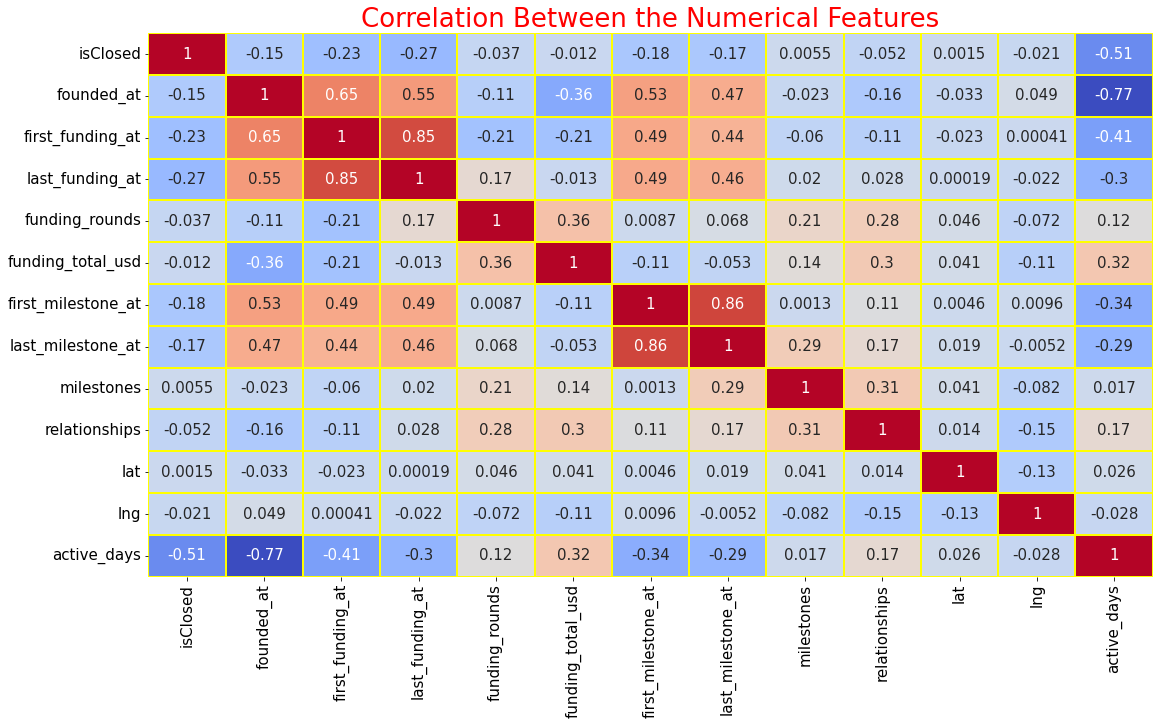

In [ ]:
num_col=['isClosed','founded_at','first_funding_at','last_funding_at','funding_rounds',
                      'funding_total_usd','first_milestone_at','last_milestone_at','milestones',
                      'relationships','lat','lng','active_days']

plt.figure(figsize=(18,10))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm', cbar=False,
            linecolor='yellow', linewidth=2, annot_kws={"size": 15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation Between the Numerical Features", fontsize=26, color='red');

### Observation and feature selection based on above correlation Matrix:
- Multicolinearity exists between columns `first_funding_at` and `last_funding_at` with correlation coefficient `0.85`. also between `first_milestone_at` and `last_milestone_at` with coefficient value `0.86`. We will drop any one column.
- The stronger negative correlations (closer to -1) with "isClosed" are observed for `active_days`, `last_funding_at`, `first_funding_at`, `first_milestone_at`, `last_milestone_at` and `founded_at`.
- The weaker negative correlations (closer to 0) include `lng`, `relationships`, `funding_rounds`, `funding_total_usd`.
- The weaker positive correlations (closer to 0) are seen with `lat` and `milestones`.
- From above correlation matrix we observed that there are 5 features which have correlation coeffienct less than `+0.05` or `-0.05`. These features are `lng`, `lat`, `funding_rounds`, `funding_total_usd` and `milestones`. We can eliminate these features.

In [ ]:
df.drop(['first_funding_at','first_milestone_at'], axis=1, inplace=True)

### Limitations of Correlation Analysis for feature selection:
**1. Non-Linear Relationships:**
- Correlation measures linear relationships, and it might not capture non-linear dependencies. For capturing non-linear relationships, other techniques such as mutual information or non-linear feature selection methods may be more suitable.

**2. Imbalanced Datasets:**
- Our dataset is highly imbalanced, where one class dominates the other, correlation might be biased towards the majority class. In such cases, it's essential to consider other techniques like resampling (e.g., SMOTE) to address class imbalance.


**Its better to use other techniques like `Mutual Information` and `PCA`.**

**---------------------------------------------------------------------------------------------------------------------------------------------------------------**

### 2 . Mutual Information:
- Mutual Information (MI) is a statistical metric that measures the dependence or information shared between two variables. In the context of feature selection, mutual information can be used to evaluate the relationship between each feature and the target variable. Features with high mutual information are considered more informative for predicting the target variable.

**To calculate MI Score all input features should be of numeric type and scaled around its mean = 0 and standard deviation =1.**

**Steps to apply mutual information technique to select best features.**
1. Encode categorical column
2. Standardize numeric column
3. Select best `K` features with high MI Score.

#### Step-1.  Encode Categorical columns using pandas dummies.

In [ ]:
dummies_country=pd.get_dummies(df['country_code'], dtype=int, prefix='country_code')
df=pd.concat((df, dummies_country), axis=1)
df.drop('country_code', axis=1, inplace=True)

dummies_category=pd.get_dummies(df['category_code'], dtype=int, prefix='category_code')
df=pd.concat((df, dummies_category), axis=1)
df.drop('category_code', axis=1, inplace=True)
df.head()

isClosed  founded_at  last_funding_at  funding_rounds  funding_total_usd  \
0         0        2003             2012               3         10125293.0   
1         0        2003             2003               1           250000.0   
2         0        2004             2011               1          1500000.0   
3         0        2006             2007               1          2500000.0   
4         0        2004             2011               1          3800000.0   

   last_milestone_at  milestones  relationships        lat         lng  \
0               2010           1              6  30.267153  -97.743061   
1               2007           1              2 -27.469771  153.025124   
2               2010           1              8  47.610150 -122.201516   
3               2012           2              7  37.774929 -122.419415   
4               2012           1              9  47.610150 -122.201516   

   active_days  country_code_AUS  country_code_CAN  country_code_DEU  \
0       6570.0                 0                 0                 0   
1       6570.0                 1                 0                 0   
2       6205.0                 0                 0                 0   
3       5475.0                 0                 0                 0   
4       6205.0                 0                 0                 0   

   country_code_ESP  country_code_FRA  country_code_GBR  country_code_IND  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   country_code_ISR  country_code_USA  country_code_other  \
0                 0                 1                   0   
1                 0                 0                   0   
2                 0                 1                   0   
3                 0                 1                   0   
4                 0                 1                   0   

   category_code_advertising  category_code_analytics  category_code_biotech  \
0                          0                        0                      0   
1                          0                        0                      0   
2                          0                        0                      0   
3                          0                        0                      0   
4                          0                        0                      0   

   category_code_cleantech  category_code_ecommerce  category_code_education  \
0                        1                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        1                        0   

   category_code_enterprise  category_code_finance  category_code_games_video  \
0                         0                      0                          0   
1                         0                      0                          0   
2                         1                      0                          0   
3                         0                      0                          0   
4                         0                      0                          0   

   category_code_hardware  category_code_mobile  \
0                       0                     0   
1                       0                     1   
2                       0                     0   
3                       0                     0   
4                       0                     0   

   category_code_network_hosting  category_code_other  category_

#### Step-2. Standardize Numeric Fearues using sklearn's StandardScaler

In [ ]:
features=df.drop('isClosed', axis=1) # Independent features
target=df['isClosed']                # Dependent feature

num_features=features[['founded_at','last_funding_at','funding_rounds',
                      'funding_total_usd','last_milestone_at','milestones',
                      'relationships','lat','lng','active_days']]
cat_features=features.drop(num_features.columns, axis=1)

scaler = StandardScaler()
std_features_num = pd.DataFrame(scaler.fit_transform(num_features), columns=num_features.columns)
standardized_features=pd.concat((std_features_num,cat_features), axis=1)

standardized_features.head()

founded_at  last_funding_at  funding_rounds  funding_total_usd  \
0   -2.046542         0.336802        2.158355           1.048709   
1   -2.046542        -4.246849       -0.722207          -0.665422   
2   -1.715900        -0.172493       -0.722207          -0.448450   
3   -1.054616        -2.209671       -0.722207          -0.274872   
4   -1.715900        -0.172493       -0.722207          -0.049221   

   last_milestone_at  milestones  relationships       lat       lng  \
0          -0.489434   -0.729614       0.587761 -0.551906 -0.584879   
1          -1.711569   -0.729614      -0.754438 -4.470812  3.185538   
2          -0.489434   -0.729614       1.258860  0.625253 -0.952623   
3           0.325323    0.808153       0.923310 -0.042315 -0.955899   
4           0.325323   -0.729614       1.594410  0.625253 -0.952623   

   active_days  country_code_AUS  country_code_CAN  country_code_DEU  \
0     1.962376                 0                 0                 0   
1     1.962376                 1                 0                 0   
2     1.671457                 0                 0                 0   
3     1.089619                 0                 0                 0   
4     1.671457                 0                 0                 0   

   country_code_ESP  country_code_FRA  country_code_GBR  country_code_IND  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   country_code_ISR  country_code_USA  country_code_other  \
0                 0                 1                   0   
1                 0                 0                   0   
2                 0                 1                   0   
3                 0                 1                   0   
4                 0                 1                   0   

   category_code_advertising  category_code_analytics  category_code_biotech  \
0                          0                        0                      0   
1                          0                        0                      0   
2                          0                        0                      0   
3                          0                        0                      0   
4                          0                        0                      0   

   category_code_cleantech  category_code_ecommerce  category_code_education  \
0                        1                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        1                        0   

   category_code_enterprise  category_code_finance  category_code_games_video  \
0                         0                      0                          0   
1                         0                      0                          0   
2                         1                      0                          0   
3                         0                      0                          0   
4                         0                      0                          0   

   category_code_hardware  category_code_mobile  \
0                       0                     0   
1                       0                     1   
2                       0                     0   
3                       0                     0   
4                       0                     0   

   category_code_network_hosting  category_code_other  category_code_social  \
0                              0                    0          

In [ ]:
standardized_features.shape

(8713, 36)

#### Step-3. Select best features.
- Here I am selecting features having MI Score > 0.

In [ ]:
feature_names=standardized_features.columns       # Name of input features


#k_best = 20                          # Top 20 best features
selector = SelectKBest(mutual_info_classif)
selection = selector.fit_transform(standardized_features, target)


selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]


mi_score_df=pd.DataFrame({'Feature_Names':[],'Mutual_Information_Score':[]})
for feature_name, mi_score in zip(feature_names, selector.scores_):
    mi_score_df=pd.concat((mi_score_df, pd.DataFrame({'Feature_Names':[feature_name],
                                                      'Mutual_Information_Score':[mi_score]})), axis=0)

# Feature with MI Score > 0
mi_score_selected_df=mi_score_df[mi_score_df['Mutual_Information_Score']>0]
mi_score_selected_df

Feature_Names  Mutual_Information_Score
0                 founded_at                  0.026662
0            last_funding_at                  0.047077
0             funding_rounds                  0.005140
0          funding_total_usd                  0.001071
0          last_milestone_at                  0.030809
0                 milestones                  0.000983
0              relationships                  0.004054
0                        lat                  0.003404
0                active_days                  0.189353
0           country_code_CAN                  0.000751
0           country_code_DEU                  0.002515
0           country_code_IND                  0.004572
0           country_code_ISR                  0.001698
0           country_code_USA                  0.003196
0    category_code_analytics                  0.001257
0      category_code_biotech                  0.000787
0    category_code_cleantech                  0.001662
0    category_code_education                  0.001898
0   category_code_enterprise                  0.004144
0  category_code_games_video                  0.002109
0       category_code_mobile                  0.000065
0        category_code_other                  0.001918
0     category_code_software                  0.000344
0          category_code_web                  0.003216

In [ ]:
print("Total number of features selected : ", mi_score_selected_df['Feature_Names'].nunique())
print("Selected Features:\n", mi_score_selected_df['Feature_Names'].unique())

Total number of features selected :  24
Selected Features:
 ['founded_at' 'last_funding_at' 'funding_rounds' 'funding_total_usd'
 'last_milestone_at' 'milestones' 'relationships' 'lat' 'active_days'
 'country_code_CAN' 'country_code_DEU' 'country_code_IND'
 'country_code_ISR' 'country_code_USA' 'category_code_analytics'
 'category_code_biotech' 'category_code_cleantech'
 'category_code_education' 'category_code_enterprise'
 'category_code_games_video' 'category_code_mobile' 'category_code_other'
 'category_code_software' 'category_code_web']


In [ ]:
mi_score_features=standardized_features[mi_score_selected_df['Feature_Names']]
mi_score_features.head()

founded_at  last_funding_at  funding_rounds  funding_total_usd  \
0   -2.046542         0.336802        2.158355           1.048709   
1   -2.046542        -4.246849       -0.722207          -0.665422   
2   -1.715900        -0.172493       -0.722207          -0.448450   
3   -1.054616        -2.209671       -0.722207          -0.274872   
4   -1.715900        -0.172493       -0.722207          -0.049221   

   last_milestone_at  milestones  relationships       lat  active_days  \
0          -0.489434   -0.729614       0.587761 -0.551906     1.962376   
1          -1.711569   -0.729614      -0.754438 -4.470812     1.962376   
2          -0.489434   -0.729614       1.258860  0.625253     1.671457   
3           0.325323    0.808153       0.923310 -0.042315     1.089619   
4           0.325323   -0.729614       1.594410  0.625253     1.671457   

   country_code_CAN  country_code_DEU  country_code_IND  country_code_ISR  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   country_code_USA  category_code_analytics  category_code_biotech  \
0                 1                        0                      0   
1                 0                        0                      0   
2                 1                        0                      0   
3                 1                        0                      0   
4                 1                        0                      0   

   category_code_cleantech  category_code_education  category_code_enterprise  \
0                        1                        0                         0   
1                        0                        0                         0   
2                        0                        0                         1   
3                        0                        0                         0   
4                        0                        0                         0   

   category_code_games_video  category_code_mobile  category_code_other  \
0                          0                     0                    0   
1                          0                     1                    0   
2                          0                     0                    0   
3                          0                     0                    0   
4                          0                     0                    0   

   category_code_software  category_code_web  
0                       0                  0  
1                       0                  0  
2                       0                  0  
3                       0                  1  
4                       0                  0

### Observation and feature selection based on Mutual Information Scores:
- There are total 38 Independed features. Out of 36, 12 features have MI Score 0, Hence these features have no dependency or doest carry any information which will help us to predict target class.
- `founded_at`,  `last_funding_at`, `funding_rounds`, `funding_total_usd`, `last_milestone_at`, `relationships`, `milestones`, `lat`, `active_days`, `country_code_CAT`, `country_code_DEU`, `country_code_IND`,`country_code_ISR`, `country_code_USA`, `category_code_analytics`, `category_code_biotech`, `category_code_cleantech`, `category_code_education`, `category_code_enterprise`,`category_code_game_video`, `category_code_mobile`, `category_code_others`, `category_code_software` and `category_code_web`. These are the selected features having MI Score greater than Zero.

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### 3 .  Principal Component Analysis (PCA):
- Principal Component Analysis (PCA) is a dimensionality reduction technique rather than a feature selection technique. However, it can indirectly serve as a method for feature selection by transforming the original features into a new set of uncorrelated variables called principal components. These principal components capture the most significant variance in the data.

### Feature selections steps in PCA
1. Standardize the variables
2. Compute the covariance matrix to identify correlations
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Create a feature vector to decide which principal components to keep
5. Recast the data along the principal components axes

**Step-1. Standardize the Variables:**
- Explantion:    
    - Standardizing involves transforming the data to have a mean of 0 and a standard deviation of 1. This step is important because PCA is sensitive to the scale of the variables.
    - Variables with larger scales might dominate the PCA process, not because they are more important, but simply due to their scale. Standardization ensures that all variables contribute equally to the analysis.

**While calculating mutual information score we already standardized our input features.**

**Step-2. Compute the Covariance Matrix to Identify Correlations:**
- Explanation:
    - The covariance matrix provides information about the relationships (correlations) between pairs of variables.
    - Covariance is a measure of how much two variables change together. A positive covariance indicates a positive relationship, while a negative covariance indicates a negative relationship.

In [ ]:
cov_matrix = np.cov(mi_score_features, rowvar=False)
print("Covariance Matrix:\n\n", cov_matrix[:1])

Covariance Matrix:

 [[ 1.00011478e+00  5.53630281e-01 -1.07431515e-01 -3.59349322e-01
   4.70281704e-01 -2.30421415e-02 -1.60922504e-01 -3.26503805e-02
  -7.71115999e-01 -1.43893606e-03  2.58941934e-04  1.70751748e-03
   1.59957964e-03 -3.09810323e-02  6.44334057e-03 -2.32827379e-02
  -8.83155035e-03  8.53513508e-03  1.20393386e-03 -6.26644098e-03
   2.50883533e-02  1.07387398e-02 -4.40405098e-02  8.01333967e-03]]


**Step-3. Compute the eigenvectors and eigenvalues of the covariance matrix**
- Explanation:
    -  Eigenvectors and eigenvalues are crucial for determining the principal components.
    - The eigenvectors represent the directions of maximum variance in the data, and the eigenvalues indicate the magnitude of variance along those directions.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigen Values:\n\n", eigenvalues)
print("\n")
print("Eigen Vectors:\n\n", eigenvectors[:1])

Eigen Values:

 [2.59889459 1.95210997 0.97312605 0.99813316 0.69706922 0.63398163
 0.58147609 0.43008269 0.2287932  0.17763396 0.15854056 0.13291796
 0.10647347 0.08016666 0.05980446 0.04029057 0.03320835 0.01155725
 0.02872274 0.01503393 0.01743886 0.01834822 0.02346318 0.02368773]


Eigen Vectors:

 [[-0.57763522 -0.0336019  -0.05999854  0.00108827 -0.07928367  0.16310407
   0.10420456 -0.05696563 -0.09928409  0.16165978 -0.75678868  0.05234073
   0.04171547  0.00859204 -0.0156078   0.00218985  0.01053941 -0.00934112
  -0.01802977  0.00198041 -0.00144084  0.00350689 -0.0232878  -0.0029403 ]]


**Step-4: Create a feature vector to decide which principal components to keep**
- Explanation:
    - Determine the number of principal components to retain based on the explained variance.
    - Eigenvectors associated with higher eigenvalues capture more variance. The feature vector is created to decide how many principal components to keep, often based on the cumulative explained variance.

Explained Variance Ratio:

 [0.25934601 0.1948028  0.09710912 0.0996046  0.06956116 0.06326559
 0.05802602 0.04291834 0.02283148 0.01772625 0.0158209  0.013264
 0.01062508 0.0079999  0.00596794 0.00402063 0.00331389 0.00115331
 0.00286627 0.00150025 0.00174024 0.00183099 0.00234141 0.00236382]


Cumulative Explained Variance:

 [0.25934601 0.45414881 0.55125793 0.65086253 0.72042369 0.78368928
 0.8417153  0.88463363 0.90746511 0.92519136 0.94101227 0.95427627
 0.96490135 0.97290126 0.9788692  0.98288983 0.98620372 0.98735703
 0.99022329 0.99172354 0.99346378 0.99529477 0.99763618 1.        ]


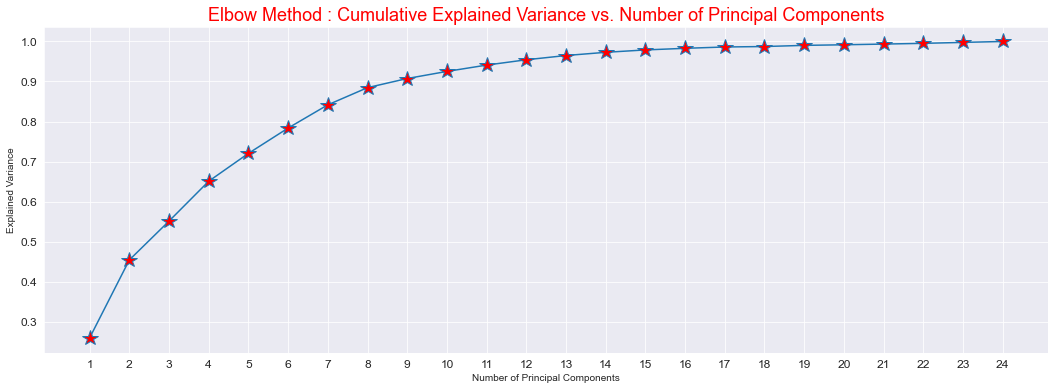

In [ ]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Explained Variance Ratio:\n\n", explained_variance_ratio)
print("\n")
print("Cumulative Explained Variance:\n\n", cumulative_explained_variance)

plt.figure(figsize=(18,6))
sns.set_style('darkgrid')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         marker='*', linestyle='-', markerfacecolor='red', markersize=16)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(np.arange(1,25,1), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Elbow Method : Cumulative Explained Variance vs. Number of Principal Components', fontsize=18, color='red')
plt.show()

**Choose the number of components based on a desired threshold**

In [ ]:
desired_variance_ratio = 0.99
n_components = np.argmax(cumulative_explained_variance >= desired_variance_ratio) + 1
n_components

19

**Step 5: Recast the data along the principal components axes**
- Explanation:
    - Transform the data using the selected principal components.
    - The data is projected onto the space defined by the selected principal components, effectively reducing the dimensionality.

In [ ]:
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(mi_score_features)

X=pd.DataFrame(features_pca, columns=[f'PC_{i+1}' for i in range(n_components)]) # Reduced Input Features
X.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  2.861321 -1.261402  0.679152 -1.829286 -0.121322 -0.430761 -1.185192   
1  3.867450  3.468745  4.321327  1.389965  0.795381 -0.173561 -0.330812   
2  2.064605  0.345559 -0.474378  0.340043 -1.712449  0.371266 -1.087122   
3  1.882724  0.144165  0.136230  2.216808 -0.351966  0.236985 -0.115496   
4  1.940569 -0.250063 -0.420062  0.441257 -2.149921  0.321717 -0.853908   

       PC_8      PC_9     PC_10     PC_11     PC_12     PC_13     PC_14  \
0  0.246318 -0.313008 -0.146115 -0.349131 -0.271436  0.041996  0.055772   
1  1.539591  0.459858  0.038824  0.638363 -0.274530  0.842635 -0.361986   
2 -0.397307 -0.329256 -0.132494 -0.320522 -0.330404  0.177223  0.710818   
3  0.868729 -0.388585 -0.065143  0.371401 -0.559421 -0.525253 -0.232832   
4  0.128319 -0.344849 -0.103151 -0.390842 -0.235460  0.095751  0.055695   

      PC_15     PC_16     PC_17     PC_18     PC_19  
0  0.116000  0.143225 -0.007505 -0.109938  0.001459  
1 -0.208994 -0.009438  0.023403  0.026876  0.038994  
2 -0.527833 -0.190747 -0.043825  0.090358 -0.005821  
3 -0.083477 -0.030133  0.004785  0.008051  0.008027  
4  0.104827  0.116957 -0.029335 -0.064590 -0.017568

In [ ]:
X.shape

(8713, 19)

**Concatenate `final selected feature's PCA` and `Target variable`, save this as `final_data`.**

In [ ]:
final_data=pd.concat((X,target), axis=1)
final_data.to_csv('data/final_data.csv', index=False)
final_data.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0  2.861321 -1.261402  0.679152 -1.829286 -0.121322 -0.430761 -1.185192   
1  3.867450  3.468745  4.321327  1.389965  0.795381 -0.173561 -0.330812   
2  2.064605  0.345559 -0.474378  0.340043 -1.712449  0.371266 -1.087122   
3  1.882724  0.144165  0.136230  2.216808 -0.351966  0.236985 -0.115496   
4  1.940569 -0.250063 -0.420062  0.441257 -2.149921  0.321717 -0.853908   

       PC_8      PC_9     PC_10     PC_11     PC_12     PC_13     PC_14  \
0  0.246318 -0.313008 -0.146115 -0.349131 -0.271436  0.041996  0.055772   
1  1.539591  0.459858  0.038824  0.638363 -0.274530  0.842635 -0.361986   
2 -0.397307 -0.329256 -0.132494 -0.320522 -0.330404  0.177223  0.710818   
3  0.868729 -0.388585 -0.065143  0.371401 -0.559421 -0.525253 -0.232832   
4  0.128319 -0.344849 -0.103151 -0.390842 -0.235460  0.095751  0.055695   

      PC_15     PC_16     PC_17     PC_18     PC_19  isClosed  
0  0.116000  0.143225 -0.007505 -0.109938  0.001459         0  
1 -0.208994 -0.009438  0.023403  0.026876  0.038994         0  
2 -0.527833 -0.190747 -0.043825  0.090358 -0.005821         0  
3 -0.083477 -0.030133  0.004785  0.008051  0.008027         0  
4  0.104827  0.116957 -0.029335 -0.064590 -0.017568         0

### Observation and feature selection based on PCA:
- 19 Principal Components are selected as Input Features.
- `X` contains the data represented along the selected principal components. These components capture the most significant information in the dataset while reducing dimensionality.

**------------------------------------------------------------------------------------------------------------------------------------------------------------**